# Data Analysis and ML

## Task



### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### Read Data

In [ ]:
df = pd.read_csv('/content/filedata.csv')

### Check first five rows

In [ ]:
df.head()  # show the first few rows of the dataset


,What is the size of your SME/How many employees are there in your SME/firm?,"In which sector/industry, does your SME belong?",What is the geographical location (Country/city) of your SME/firm?,Since how many years your SME/firm is in action?,What is your current designation?,What is your age?,What is your academic qualification?,Since how long have you been using Cloud computing technology?,Do you think or perceive that CC is a useful technology and it is easy to use?,Elaborate your response,...,Do you think Server-provider support (SPS) can affect firms’ adoption of CC?,"Did your firm’s Server-provider support (SPS) changed/influenced the decision adoption of CC in your firm? if yes, how?",Kindly elaborate,Cloud Models Being used/adopted \nWhich cloud solution does your SME use?,Which layer of cloud or service model is used by your SME?,"Do you prefer having a private cloud model or would you prefer an externally managed cloud service or outsourcing the IT service, and why?",Did your firm outsource any of its supporting IT services/Applications or other supporting business processes to a Cloud Computing service provider to enhance efficiency and reduce cost? Name the function.,"Do you think the operational efficiency, productivity, and data security of your SME has increased/improved by adopting CC technology?","Will you suggest other SMEs to use CC to enhance data security, and overall efficiency and productivity of SMEs.","What are the key applications and features of CC have you and your company explored and what made this technology superior and unique, compared to other existing technologies?"
0,Above 200,Health care and pharmacy,Nairobi,More than 20 years,IT Support Engineer,30 to 40 years,Masters Degree,9 to 15 years,Agree,NaN,...,Strongly agrees,Disagree,NaN,Hybrid cloud (some features of public and some...,Platforms as a Service (PaaS),"EXTERNAL, FOR EASE OF SUPPORT AND SECURITY",IT;AD,Agree,Strongly agrees,NaN
1,25 to 50,NGO,MERU COUNTY,More than 20 years,IT Support Engineer,20 to 30 years,Bachelor degree,4 to 8 years,Strongly agrees,CLOUD COMPUTING enables the organization have ...,...,Agree,Neutral,it assisted making work easy,Private cloud (owned and managed internally),Software as a Service (SaaS),private as its easy to manage,CRM/Sales Management,Agree,Strongly agrees,Service Automation
2,Above 200,Manufacturing sector,uganda\ kakira,More than 20 years,IT Support Engineer,30 to 40 years,Bachelors degree,1 to 3 years,Disagree,training is needed for new users,...,Strongly agrees,Agree,having someone to resolve your problems helped,Partner cloud (owned and managed by a trusted ...,Software as a Service (SaaS),outsourcing is more cost effective thus prefer...,email,Strongly agrees,Strongly agrees,so far only email on the cloud. prior it was o...
3,100 to 200,Automobile sector,Djibouti,12 to 20 years,sales and marketing officer,30 to 40 years,College pass-out,1 to 3 years,Agree,through training you can learn quickly to use ...,...,Strongly agrees,Strongly disagrees,NaN,Partner cloud (owned and managed by a trusted ...,Software as a Service (SaaS),OUTSOURCING IS MORE AFFORDABLE,Procurements;CRM/Sales Management,Agree,Strongly agrees,UBIQUITOUS AND RELIABLE
4,45658,Health care and pharmacy,kisumu,4 to 8 years,IT Specialist/consultant,20 to 30 years,College pass-out,1 to 3 years,Strongly agrees,saves cost of buying of equipment,...,Strongly agrees,Strongly agrees,"yes, they offered support",Private cloud (owned and managed internally),Software as a Service (SaaS),reliable and fast,Payroll;IT,Agree,Agree,work in idea


### Data cleaning

In [ ]:
data = df

# Extract relevant columns based on the provided column names
relevant_columns = [
    "Size of SME/Number of employees",
    "Sector/Industry",
    "Geographical Location",
    "Years in Action",
    "Current Designation",
    "Age",
    "Academic Qualification",
    "Years Using Cloud Computing",
    "Perception of Cloud Computing",
    "Elaboration of Response",
    "Factors Influencing Adoption of CC",
    "Problems Before Adoption of CC",
    "Internal Motivations for Adoption of CC",
    "Innovation Perception of CC",
    "Experience of Adopting CC",
    "Benefits of Using CC",
    "Risks and Challenges of Adopting CC",
    "Company Status at CC Adoption",
    "Technological Readiness",
    "Staff Training for CC Adoption",
    "Impact of Firm Size on Innovativeness",
    "Top Management Support for CC Adoption",
    "Senior Management Role in CC Adoption",
    "Resource Provision for CC Adoption",
    "External Pressure for CC Adoption",
    "External Factors Influencing CC Adoption",
    "Server-Provider Support Impact on CC Adoption",
    "Changes Due to Server-Provider Support",
    "Cloud Solution Being Used",
    "Cloud Service Model Used",
    "Preference for Cloud Model",
    "Outsourcing IT Services to Cloud Provider",
    "Impact of CC on Operational Efficiency and Productivity",
    "Recommendation of CC for Data Security and Efficiency",
    "Key Applications and Features of CC Explored"
]

data = data.iloc[:, :len(relevant_columns)]

# Clean and preprocess the data
cleaned_data = data.applymap(lambda x: str(x).strip() if pd.notnull(x) else "")
cleaned_data.columns = relevant_columns

# Display the cleaned and preprocessed DataFrame
print("\nCleaned and Preprocessed Data:")
print(cleaned_data.head())

# Perform exploratory data analysis (optional)
# Example: Display summary statistics
print("\nSummary Statistics:")
print(cleaned_data.describe(include='all'))



Cleaned and Preprocessed Data:
  Size of SME/Number of employees           Sector/Industry  \
0                       Above 200  Health care and pharmacy   
1                        25 to 50                       NGO   
2                       Above 200      Manufacturing sector   
3                      100 to 200         Automobile sector   
4                           45658  Health care and pharmacy   

  Geographical Location     Years in Action          Current Designation  \
0               Nairobi  More than 20 years          IT Support Engineer   
1           MERU COUNTY  More than 20 years          IT Support Engineer   
2        uganda\ kakira  More than 20 years          IT Support Engineer   
3              Djibouti      12 to 20 years  sales and marketing officer   
4                kisumu        4 to 8 years     IT Specialist/consultant   

              Age Academic Qualification Years Using Cloud Computing  \
0  30 to 40 years         Masters Degree               9 to 

### Data preprocessing of Categorical and numeric data


In [ ]:
# Define a function to set a specific format for the size of SME
def set_specific_format(size):
    if "to" in size:
        lower_bound, _ = size.split(" to ")
        return lower_bound
    elif size.isdigit():
        return size
    elif size == "Above 200":
        return "200+"
    else:
        return size

# Apply the function to the "Size of SME/Number of employees" column
cleaned_data["Size of SME/Number of employees"] = cleaned_data["Size of SME/Number of employees"].apply(set_specific_format)
cleaned_data["Years in Action"] = cleaned_data["Years in Action"].str.replace("More than 20 years", "20+")
cleaned_data["Years in Action"] = cleaned_data["Years in Action"].str.replace("12 to 20 years", "12-20")
cleaned_data["Years in Action"] = cleaned_data["Years in Action"].str.replace("9 to 12 years", "9-12")
cleaned_data["Years in Action"] = cleaned_data["Years in Action"].str.replace("4 to 8 years", "4-8")
cleaned_data["Years in Action"] = cleaned_data["Years in Action"].str.replace("1-3 years", "1-3")

cleaned_data["Years Using Cloud Computing"] = cleaned_data["Years Using Cloud Computing"].str.replace("More than 20 years", "20+")
cleaned_data["Years Using Cloud Computing"] = cleaned_data["Years Using Cloud Computing"].str.replace("12 to 20 years", "12-20")
cleaned_data["Years Using Cloud Computing"] = cleaned_data["Years Using Cloud Computing"].str.replace("9 to 12 years", "9-12")
cleaned_data["Years Using Cloud Computing"] = cleaned_data["Years Using Cloud Computing"].str.replace("4 to 8 years", "4-8")
cleaned_data["Years Using Cloud Computing"] = cleaned_data["Years Using Cloud Computing"].str.replace("1-3 years", "1-3")



In [ ]:
# Define categorical and numeric columns
categorical_columns = [
    "Size of SME/Number of employees",
    "Sector/Industry",
    "Geographical Location",
    "Years in Action",
    "Current Designation",
    "Academic Qualification",
    "Factors Influencing Adoption of CC",
    "Problems Before Adoption of CC",
    "Internal Motivations for Adoption of CC",
    "Benefits of Using CC",
    "Risks and Challenges of Adopting CC",
    "Company Status at CC Adoption",
    "Technological Readiness",
    "Senior Management Role in CC Adoption",
    "Server-Provider Support Impact on CC Adoption",
    "Cloud Service Model Used",
    "Preference for Cloud Model",
    "Outsourcing IT Services to Cloud Provider",
    "Impact of CC on Operational Efficiency and Productivity",
     "Experience of Adopting CC",
    "Recommendation of CC for Data Security and Efficiency"
]

numeric_columns = [
    "Age",
    "Years Using Cloud Computing",
    "Staff Training for CC Adoption",
    "Perception of Cloud Computing",
    "Innovation Perception of CC",
    "External Pressure for CC Adoption",
    "External Factors Influencing CC Adoption",
    "Changes Due to Server-Provider Support",
    "Cloud Solution Being Used",
    "Impact of Firm Size on Innovativeness",
    "Top Management Support for CC Adoption",
    "Resource Provision for CC Adoption",
    "Key Applications and Features of CC Explored"

]

# Define Likert scale columns
likert_columns = [
    "Staff Training for CC Adoption",
    "Perception of Cloud Computing",
    "Innovation Perception of CC",
    "External Pressure for CC Adoption",
    "External Factors Influencing CC Adoption",
    "Changes Due to Server-Provider Support",
    "Cloud Solution Being Used",
    "Impact of Firm Size on Innovativeness",
    "Top Management Support for CC Adoption",
    "Resource Provision for CC Adoption",
    "Key Applications and Features of CC Explored"

]

In [ ]:
# Separate dataset into categorical and numeric dataframes
categorical_df = cleaned_data[categorical_columns]
numeric_df = cleaned_data[numeric_columns]

# Display the first few rows of each dataframe
print("Categorical DataFrame:")
categorical_df.head()


Categorical DataFrame:


,Size of SME/Number of employees,Sector/Industry,Geographical Location,Years in Action,Current Designation,Academic Qualification,Factors Influencing Adoption of CC,Problems Before Adoption of CC,Internal Motivations for Adoption of CC,Benefits of Using CC,...,Company Status at CC Adoption,Technological Readiness,Senior Management Role in CC Adoption,Server-Provider Support Impact on CC Adoption,Cloud Service Model Used,Preference for Cloud Model,Outsourcing IT Services to Cloud Provider,Impact of CC on Operational Efficiency and Productivity,Experience of Adopting CC,Recommendation of CC for Data Security and Efficiency
0,200+,Health care and pharmacy,Nairobi,20+,IT Support Engineer,Masters Degree,Perceived usefulness of the technology,,Cost-effectiveness;Relative advantage;Innovati...,Cost Savings;Quality Control and reduced error...,...,Few of the company employees/managers or the C...,,,Competitor and competitive pressure;Government...,,Hybrid cloud (some features of public and some...,Platforms as a Service (PaaS),"EXTERNAL, FOR EASE OF SUPPORT AND SECURITY",EASE OF USE,IT;AD
1,25,NGO,MERU COUNTY,20+,IT Support Engineer,Bachelor degree,Willingness to use technology to earn efficien...,Disruption of power disabled access.,Cost-effectiveness;Relative advantage;Innovati...,Cost Savings;Security;Agility;Flexibility and ...,...,Your company was unaware but willing to learn ...,I had to introduce and educate my members on t...,5,Competitor and competitive pressure;Industry u...,it assisted making work easy,Private cloud (owned and managed internally),Software as a Service (SaaS),private as its easy to manage,enabled the automation of manual database backup.,CRM/Sales Management
2,200+,Manufacturing sector,uganda\ kakira,20+,IT Support Engineer,Bachelors degree,Willingness to adopt innovative technology,using end of life or obsolete hardware,Relative advantage;Improved reliability;Enhanc...,Cost Savings;Flexibility and Mobility;Disaster...,...,Few of the company employees/managers or the C...,people are still naive and not prone to change...,few,Competitor and competitive pressure;lack of ha...,having someone to resolve your problems helped,Partner cloud (owned and managed by a trusted ...,Software as a Service (SaaS),outsourcing is more cost effective thus prefer...,system availability has improved,email
3,100,Automobile sector,Djibouti,12-20,sales and marketing officer,College pass-out,Willingness to adopt innovative technology,lack of proper CRM and inventory software,Flexibility;Improved reliability;Improved Effi...,Agility;Flexibility and Mobility;Increased Col...,...,Your company was unaware but willing to learn ...,THE WORLD IS DYNAMIC AND TECHNOLOGY IS UBIQUIT...,ALL,Competitor and competitive pressure;Industry u...,,Partner cloud (owned and managed by a trusted ...,Software as a Service (SaaS),OUTSOURCING IS MORE AFFORDABLE,ITS EASIER TO MANAGE CLIENTS AND GET PROPER RE...,Procurements;CRM/Sales Management
4,45658,Health care and pharmacy,kisumu,4-8,IT Specialist/consultant,College pass-out,Willingness to adopt innovative technology,inadequate frastructur,Cost-effectiveness;Relative advantage;Flexibil...,Cost Savings;Security;Flexibility and Mobility...,...,Few of the company employees/managers or the C...,few knew about cc so they hard to learn and adopt,around 30,Technological infrastructure;Trading partner a...,"yes, they offered support",Private cloud (owned and managed internally),Software as a Service (SaaS),reliable and fast,Cloud computing is reliable and cost effective,Payroll;IT


In [ ]:
numeric_df["Years Using Cloud Computing"] = numeric_df["Years Using Cloud Computing"].str.replace("Above 50", "50+")
numeric_df["Years Using Cloud Computing"] = numeric_df["Years Using Cloud Computing"].str.replace("20 to 30 years", "20-30")
numeric_df["Years Using Cloud Computing"] = numeric_df["Years Using Cloud Computing"].str.replace("30 to 40 years", "30-40")
numeric_df["Years Using Cloud Computing"] = numeric_df["Years Using Cloud Computing"].str.replace("9 to 15 years", "9-15")
numeric_df["Years Using Cloud Computing"] = numeric_df["Years Using Cloud Computing"].str.replace("4 to 8 years", "4-8")
numeric_df["Years Using Cloud Computing"] = numeric_df["Years Using Cloud Computing"].str.replace("1 to 3 years", "1-3")


numeric_df["Age"] = numeric_df["Age"].str.replace("Above 50", "50+")
numeric_df["Age"] = numeric_df["Age"].str.replace("20 to 30 years", "20-30")
numeric_df["Age"] = numeric_df["Age"].str.replace("30 to 40 years", "30-40")
numeric_df["Age"] = numeric_df["Age"].str.replace("9 to 15 years", "9-15")
numeric_df["Age"] = numeric_df["Age"].str.replace("4 to 8 years", "4-8")
numeric_df["Age"] = numeric_df["Age"].str.replace("1 to 3 years", "1-3")

<ipython-input-9-f1b0927d9c5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df["Years Using Cloud Computing"] = numeric_df["Years Using Cloud Computing"].str.replace("Above 50", "50+")
<ipython-input-9-f1b0927d9c5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df["Years Using Cloud Computing"] = numeric_df["Years Using Cloud Computing"].str.replace("20 to 30 years", "20-30")
<ipython-input-9-f1b0927d9c5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
print("\nNumeric DataFrame:")
numeric_df.head()


Numeric DataFrame:


,Age,Years Using Cloud Computing,Staff Training for CC Adoption,Perception of Cloud Computing,Innovation Perception of CC,External Pressure for CC Adoption,External Factors Influencing CC Adoption,Changes Due to Server-Provider Support,Cloud Solution Being Used,Impact of Firm Size on Innovativeness,Top Management Support for CC Adoption,Resource Provision for CC Adoption,Key Applications and Features of CC Explored
0,30-40,9-15,Agree,Agree,Strongly agrees,Agree,Strongly agrees,Strongly agrees,Disagree,Agree,Agree,Neutral,Agree
1,20-30,4-8,Strongly agree,Strongly agrees,Strongly agrees,Agree,Neutral,Agree,Neutral,Strongly agree,Agree,Agree,Agree
2,30-40,1-3,Neutral,Disagree,Agree,Disagree,Strongly disagrees,Strongly agrees,Agree,Neutral,Disagree,Disagree,Strongly agrees
3,30-40,1-3,Agree,Agree,Strongly agrees,Strongly agrees,Neutral,Strongly agrees,Strongly disagrees,Strongly agree,Disagree,Agree,Agree
4,20-30,1-3,Neutral,Strongly agrees,Agree,Agree,Agree,Strongly agrees,Strongly agrees,Agree,Agree,Agree,Agree


In [ ]:
df = cleaned_data
df.info()  # show information about the dataset (e.g., data types, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 35 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Size of SME/Number of employees                          64 non-null     object
 1   Sector/Industry                                          64 non-null     object
 2   Geographical Location                                    64 non-null     object
 3   Years in Action                                          64 non-null     object
 4   Current Designation                                      64 non-null     object
 5   Age                                                      64 non-null     object
 6   Academic Qualification                                   64 non-null     object
 7   Years Using Cloud Computing                              64 non-null     object
 8   Perception of Cloud Computing             

### Discriptive statistics


In [ ]:
# Encode categorical columns
for columnl in likert_columns:
    numeric_df[columnl] = pd.Categorical(numeric_df[columnl])
    numeric_df[columnl] = numeric_df[columnl].cat.codes

<ipython-input-12-45331f061199>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[columnl] = pd.Categorical(numeric_df[columnl])
<ipython-input-12-45331f061199>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[columnl] = numeric_df[columnl].cat.codes
<ipython-input-12-45331f061199>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [ ]:
numeric_df.head()

,Age,Years Using Cloud Computing,Staff Training for CC Adoption,Perception of Cloud Computing,Innovation Perception of CC,External Pressure for CC Adoption,External Factors Influencing CC Adoption,Changes Due to Server-Provider Support,Cloud Solution Being Used,Impact of Firm Size on Innovativeness,Top Management Support for CC Adoption,Resource Provision for CC Adoption,Key Applications and Features of CC Explored
0,30-40,9-15,0,0,3,1,4,4,2,1,1,2,1
1,20-30,4-8,4,3,3,1,3,1,3,4,1,0,1
2,30-40,1-3,2,1,0,2,5,4,1,3,2,1,4
3,30-40,1-3,0,0,3,4,3,4,5,4,2,0,1
4,20-30,1-3,2,3,0,1,1,4,4,1,1,0,1


In [ ]:
numeric_df.describe()  # show summary statistics for each column

,Staff Training for CC Adoption,Perception of Cloud Computing,Innovation Perception of CC,External Pressure for CC Adoption,External Factors Influencing CC Adoption,Changes Due to Server-Provider Support,Cloud Solution Being Used,Impact of Firm Size on Innovativeness,Top Management Support for CC Adoption,Resource Provision for CC Adoption,Key Applications and Features of CC Explored
count,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.375000,1.796875,1.31250,2.296875,2.890625,2.390625,2.734375,2.109375,2.609375,1.281250,1.984375
std,1.548168,1.492624,1.40153,1.293202,1.298561,1.352449,1.514398,1.223022,1.507833,1.350705,1.374278
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,1.000000,2.000000,0.50000,2.500000,3.000000,3.000000,3.000000,2.000000,2.500000,1.000000,1.000000
75%,2.000000,3.000000,3.00000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000,3.250000
max,4.000000,4.000000,3.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000


In [ ]:
categorical_df.describe()

,Size of SME/Number of employees,Sector/Industry,Geographical Location,Years in Action,Current Designation,Academic Qualification,Factors Influencing Adoption of CC,Problems Before Adoption of CC,Internal Motivations for Adoption of CC,Benefits of Using CC,...,Company Status at CC Adoption,Technological Readiness,Senior Management Role in CC Adoption,Server-Provider Support Impact on CC Adoption,Cloud Service Model Used,Preference for Cloud Model,Outsourcing IT Services to Cloud Provider,Impact of CC on Operational Efficiency and Productivity,Experience of Adopting CC,Recommendation of CC for Data Security and Efficiency
count,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
unique,6,30,49,5,39,13,12,60,51,55,...,5,40,32,32,28,4,8,43,58,47
top,200+,Health care and pharmacy,Kenya,4-8,IT Support Engineer,Bachelors degree,Willingness to adopt innovative technology,,Enhanced Connectivity & Accessibility,Flexibility and Mobility,...,Few of the company employees/managers or the C...,,4,Technological infrastructure,,Partner cloud (owned and managed by a trusted ...,Software as a Service (SaaS),,,Accounting and Finance
freq,24,7,4,18,10,18,18,5,3,4,...,23,25,6,13,37,21,39,11,7,5


In [ ]:
# check for missing values
categorical_df.isnull().sum()

Size of SME/Number of employees                            0
Sector/Industry                                            0
Geographical Location                                      0
Years in Action                                            0
Current Designation                                        0
Academic Qualification                                     0
Factors Influencing Adoption of CC                         0
Problems Before Adoption of CC                             0
Internal Motivations for Adoption of CC                    0
Benefits of Using CC                                       0
Risks and Challenges of Adopting CC                        0
Company Status at CC Adoption                              0
Technological Readiness                                    0
Senior Management Role in CC Adoption                      0
Server-Provider Support Impact on CC Adoption              0
Cloud Service Model Used                                   0
Preference for Cloud Mod

#### for Numeric Cleaning

In [ ]:
numeric_df.isnull().sum()

Age                                             0
Years Using Cloud Computing                     0
Staff Training for CC Adoption                  0
Perception of Cloud Computing                   0
Innovation Perception of CC                     0
External Pressure for CC Adoption               0
External Factors Influencing CC Adoption        0
Changes Due to Server-Provider Support          0
Cloud Solution Being Used                       0
Impact of Firm Size on Innovativeness           0
Top Management Support for CC Adoption          0
Resource Provision for CC Adoption              0
Key Applications and Features of CC Explored    0
dtype: int64

### *** Distribution and Visualization***

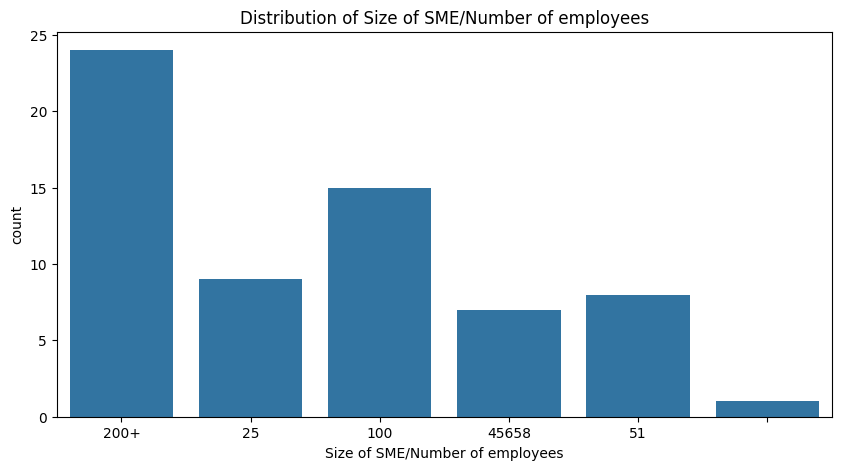

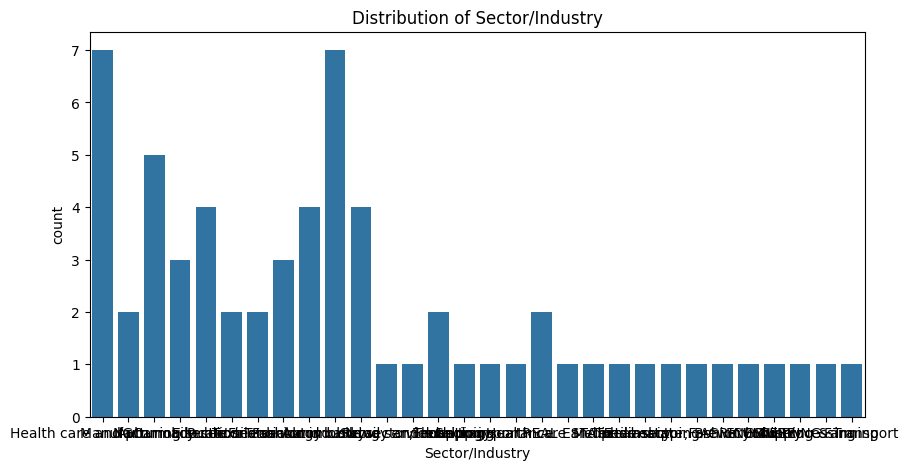

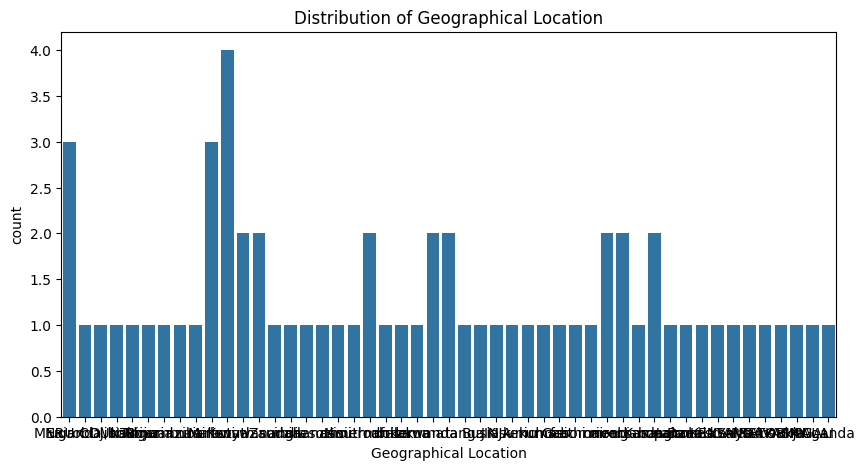

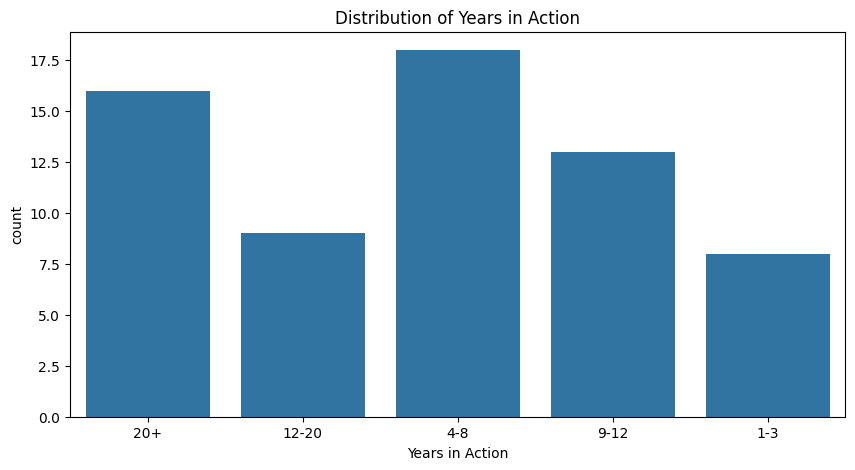

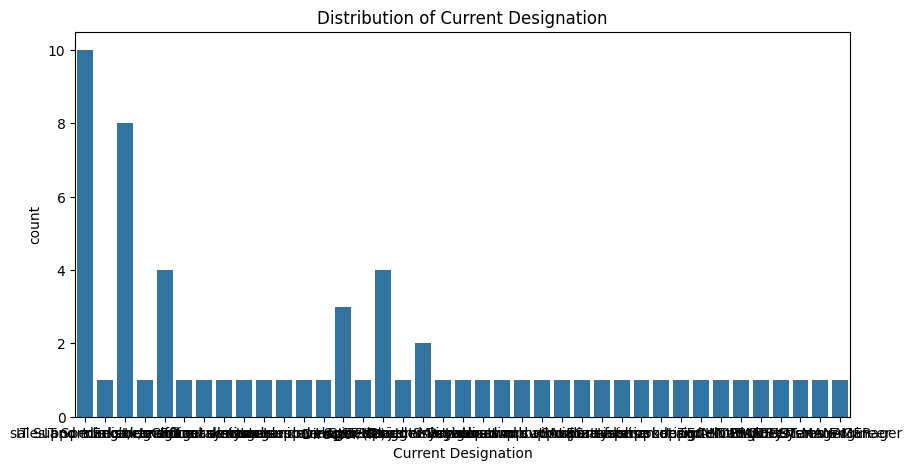

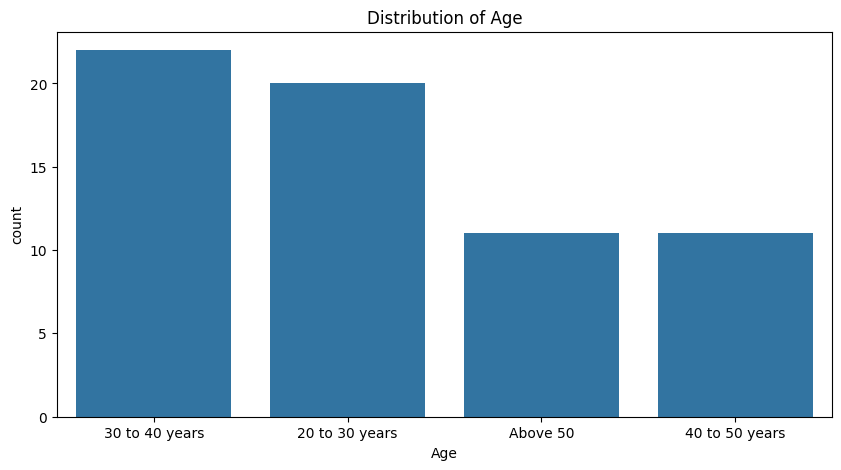

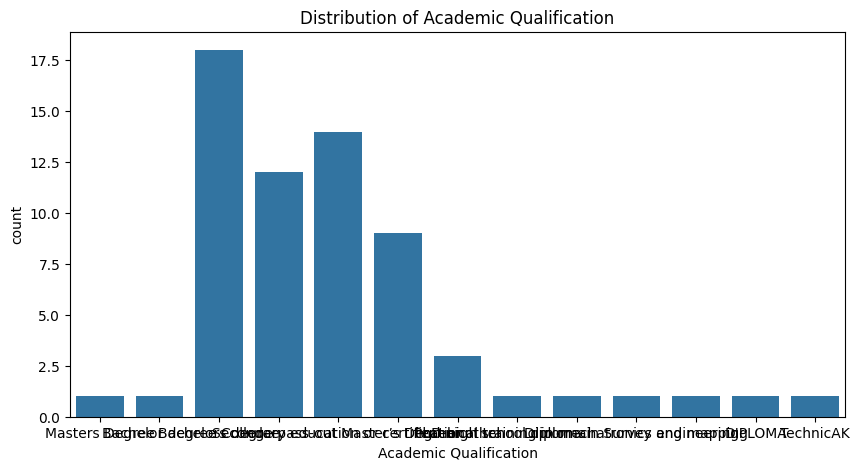

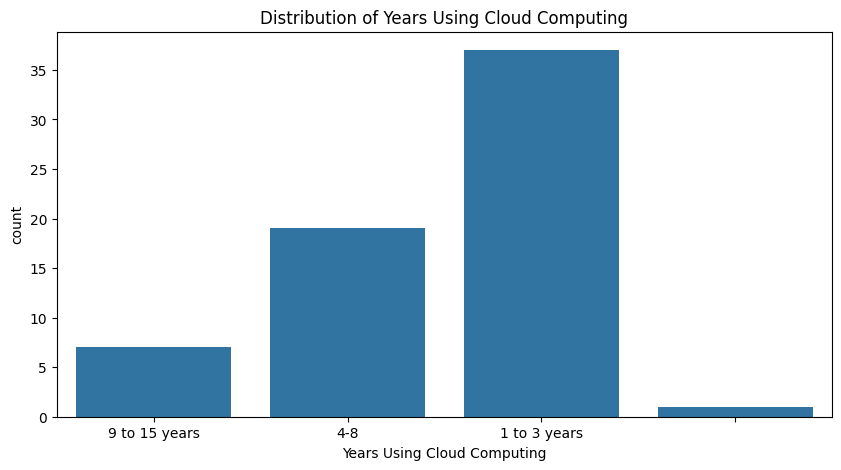

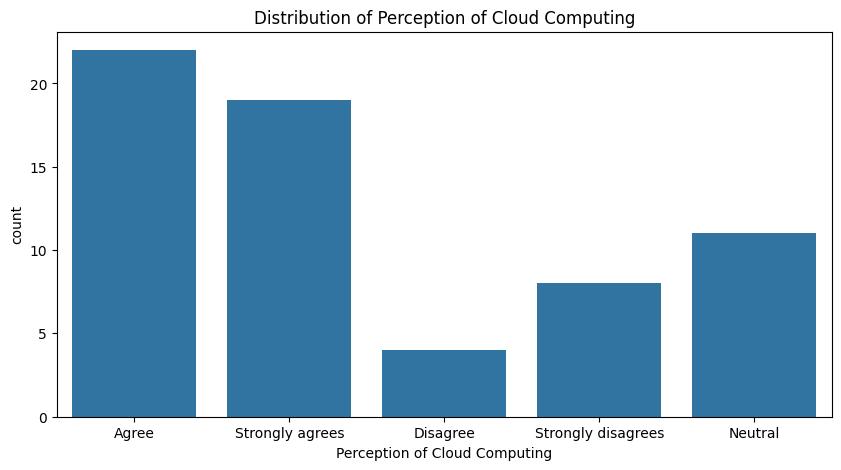

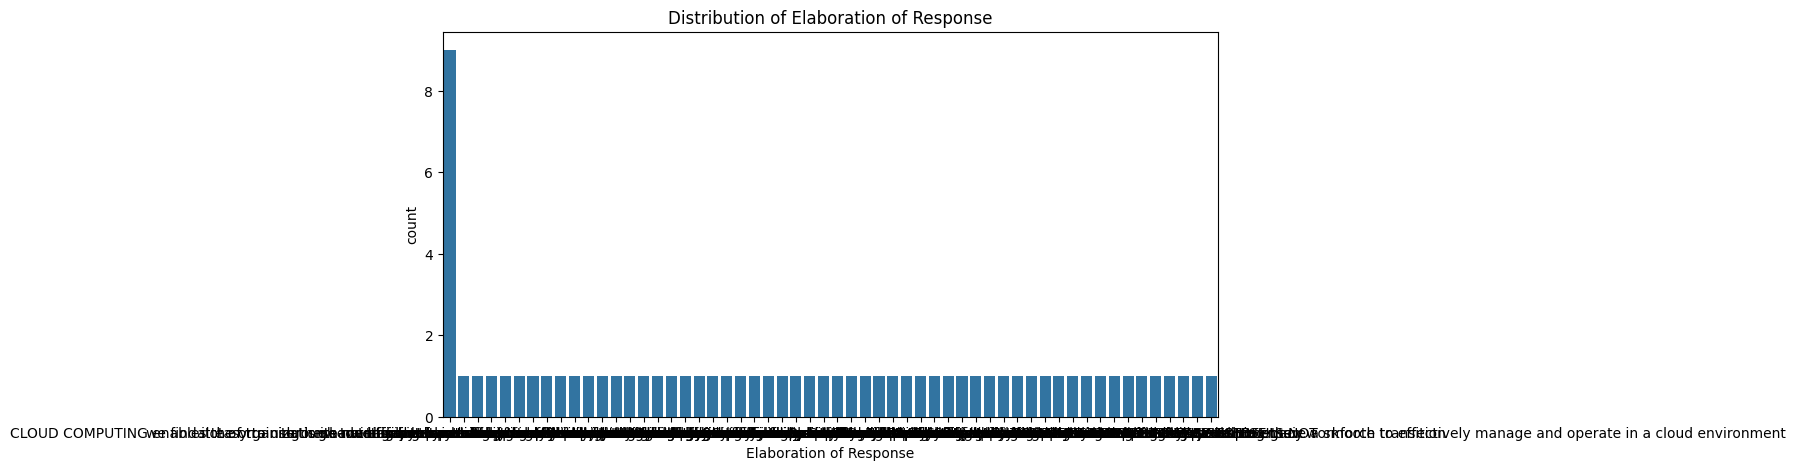

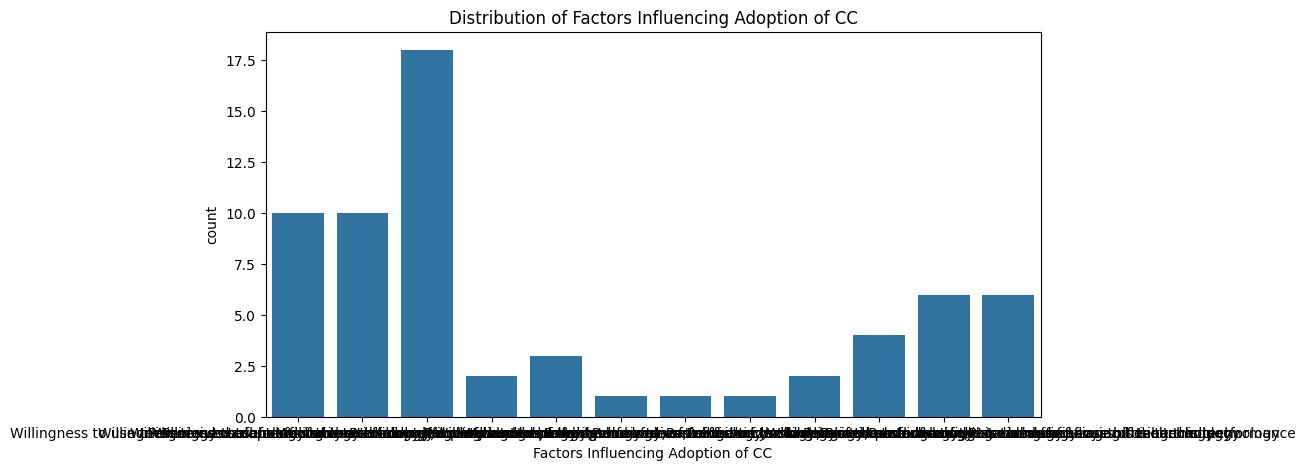

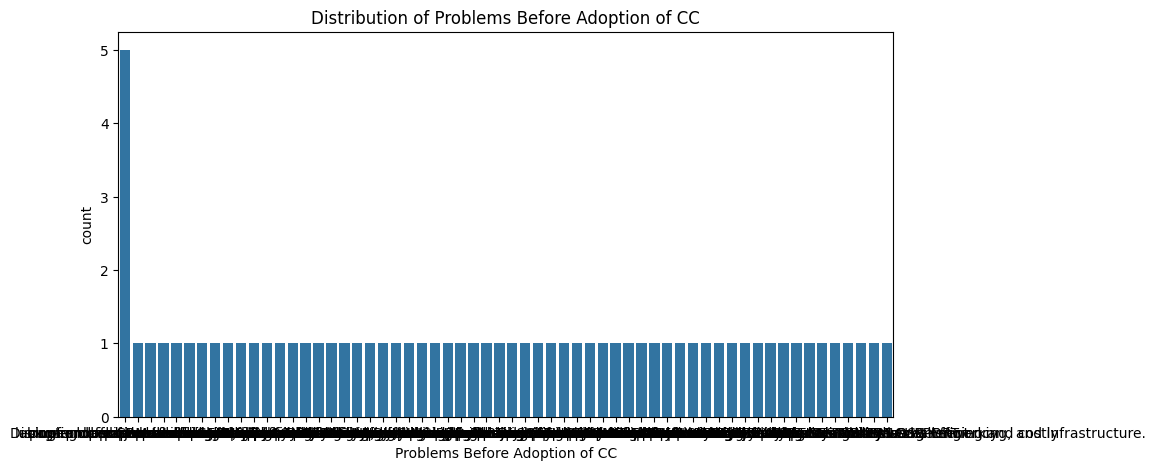

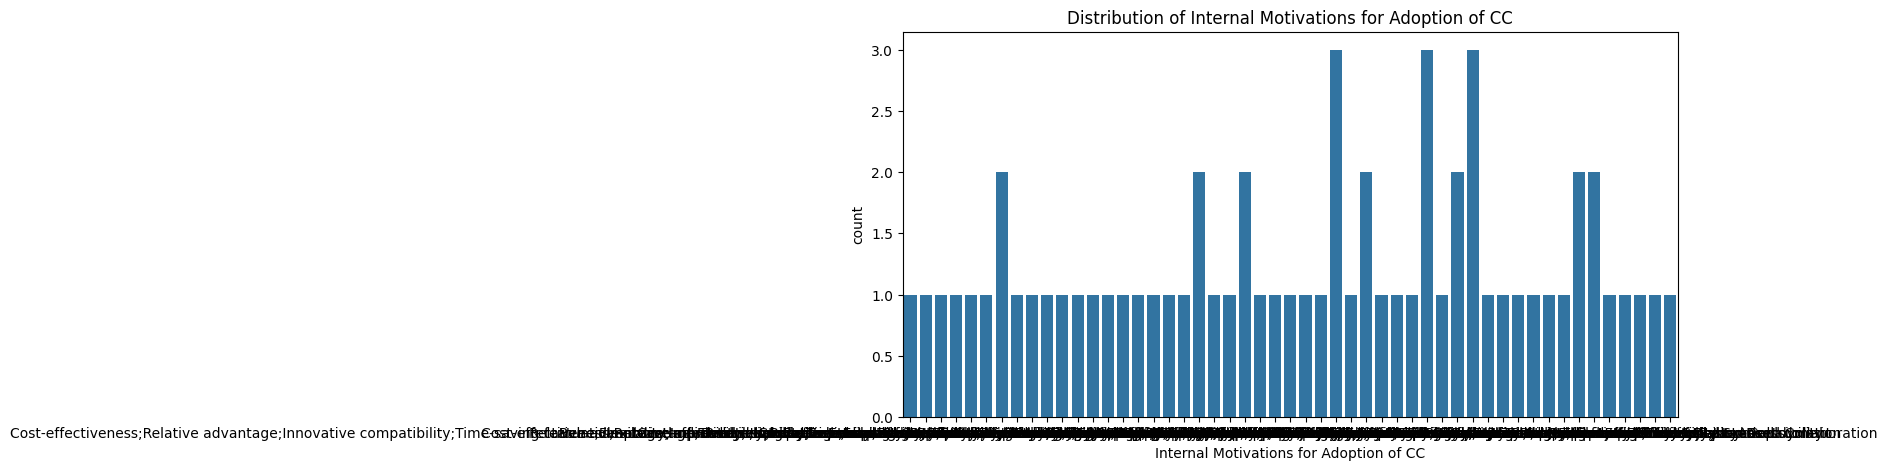

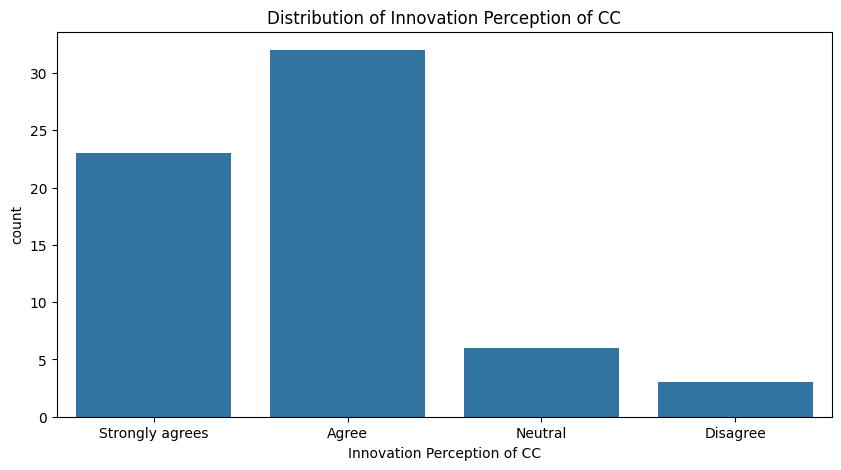

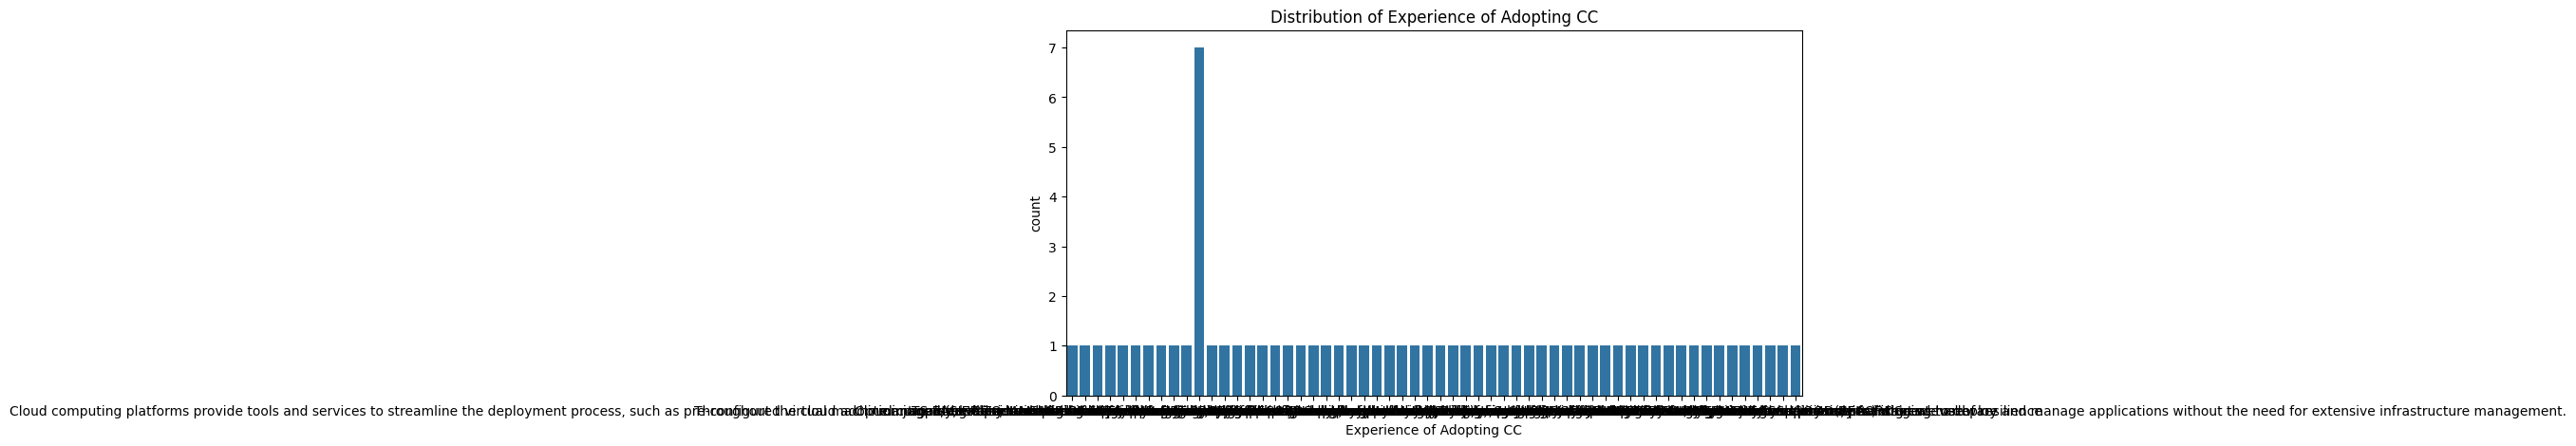

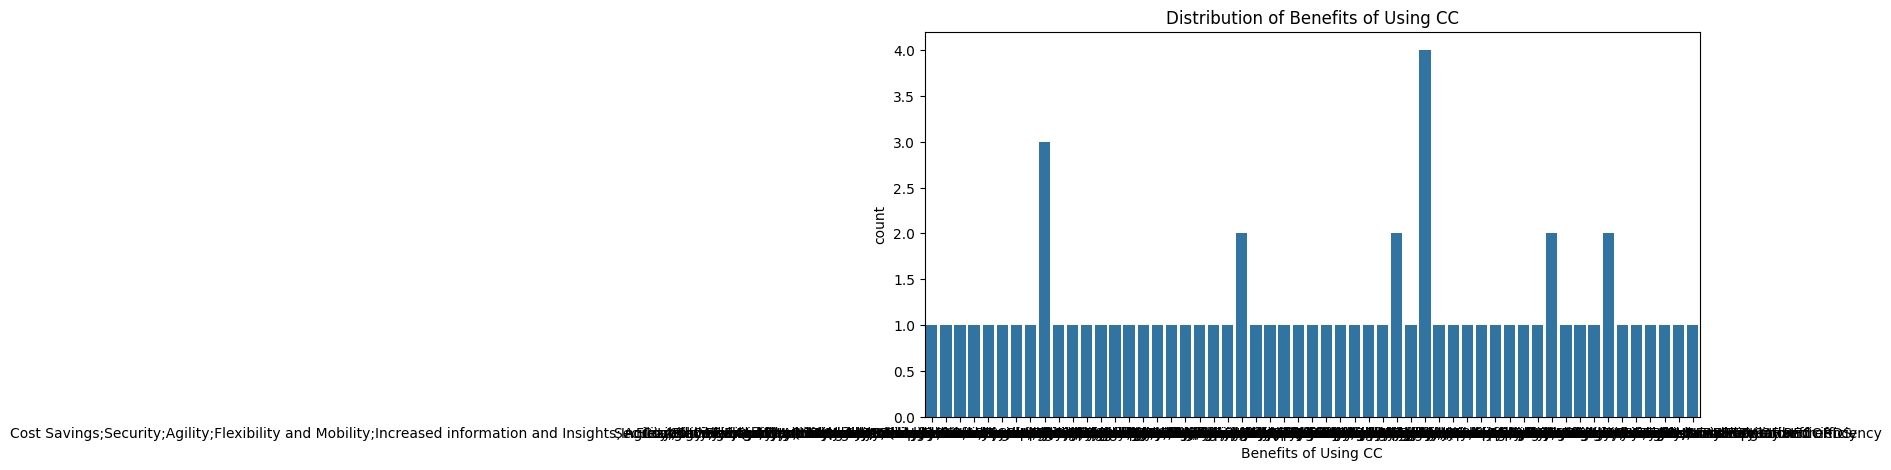

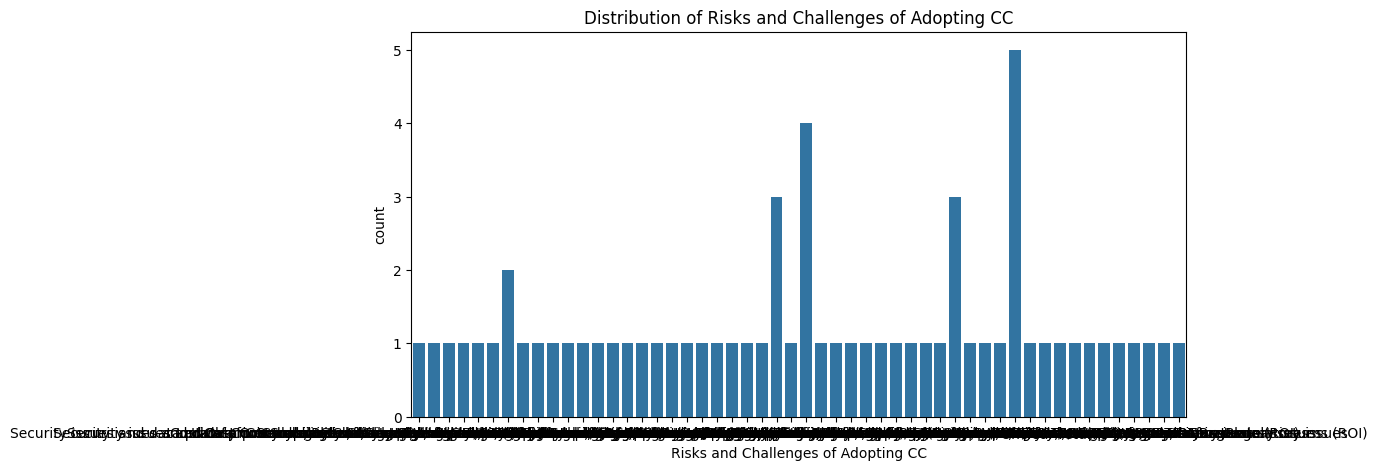

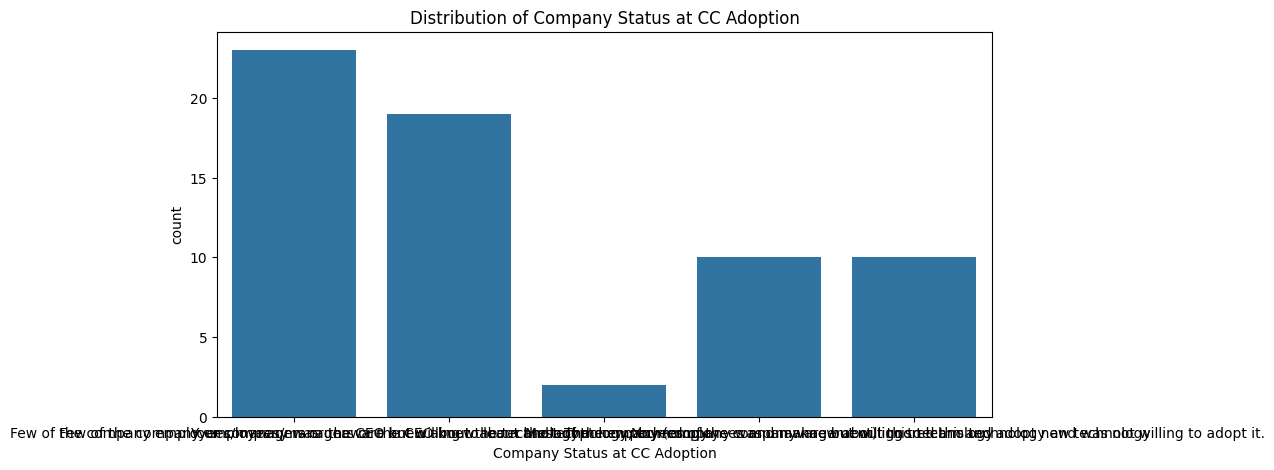

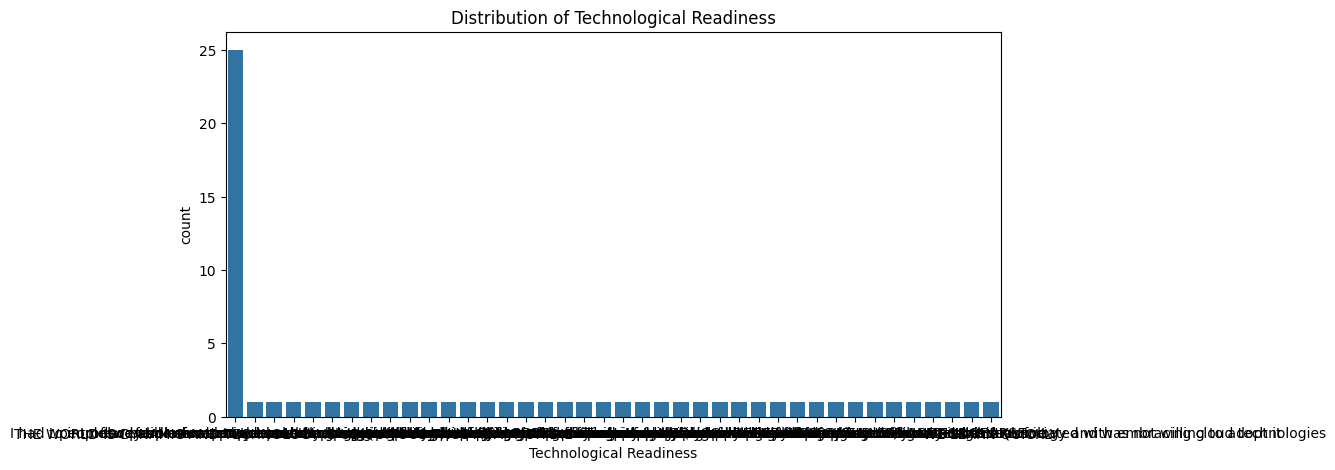

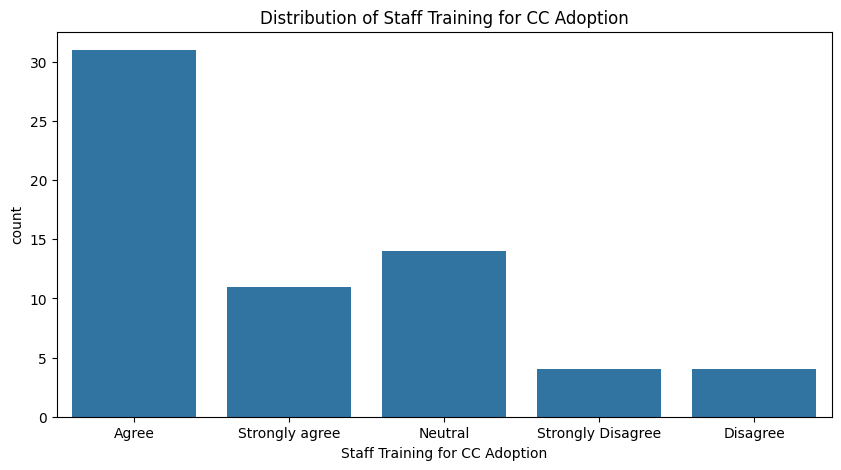

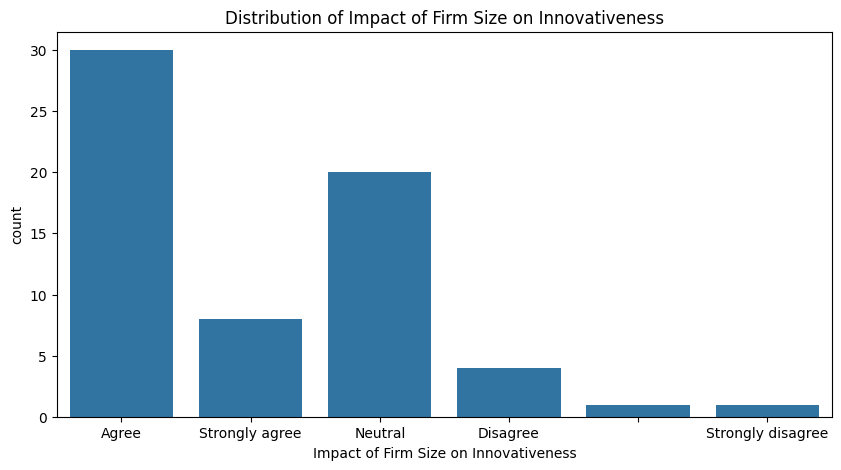

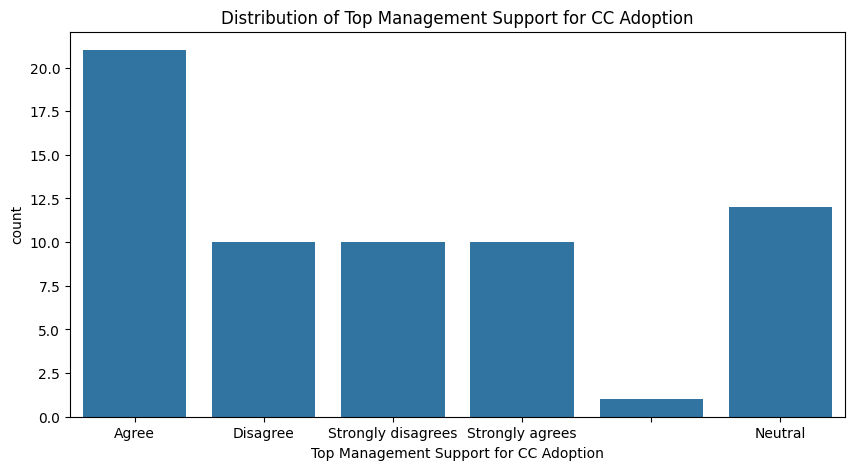

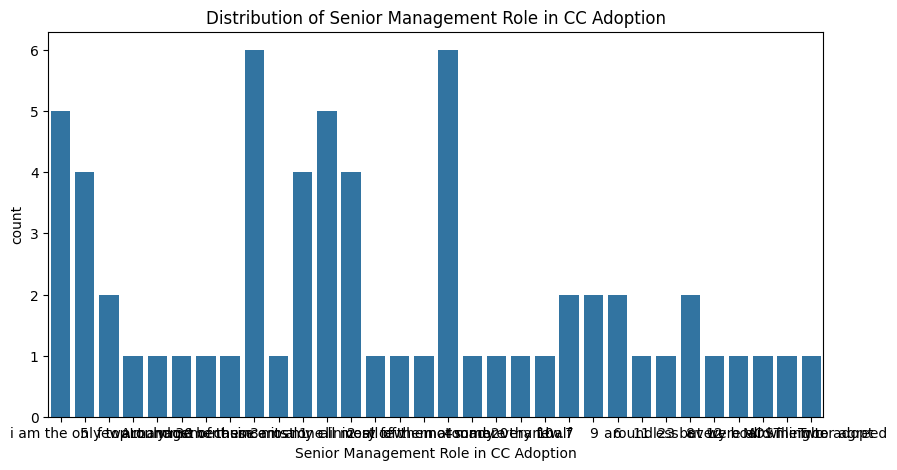

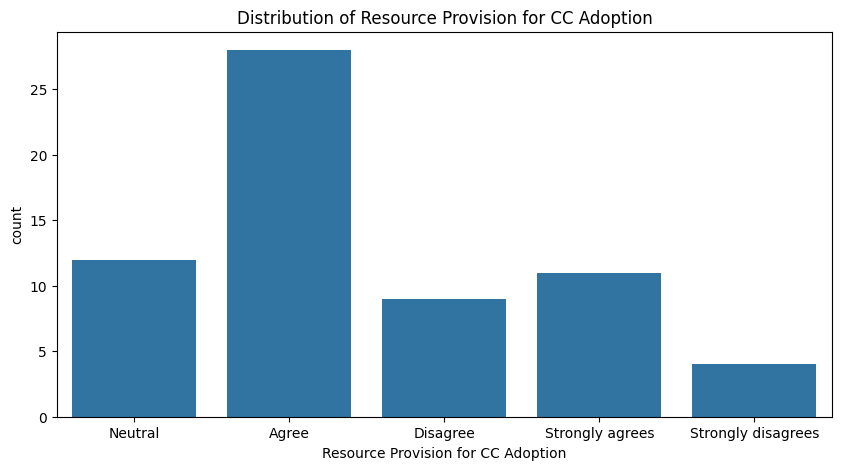

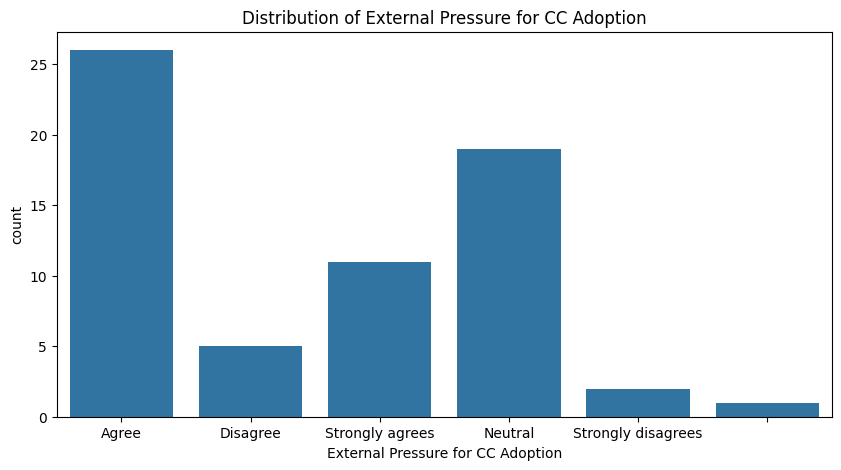

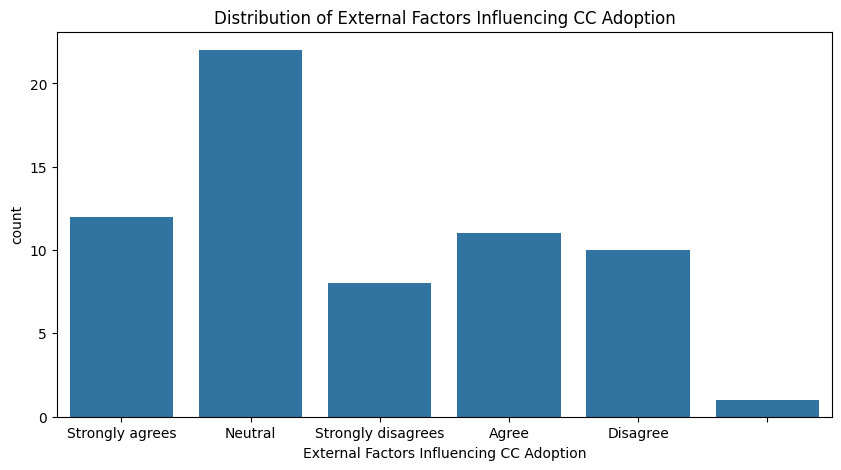

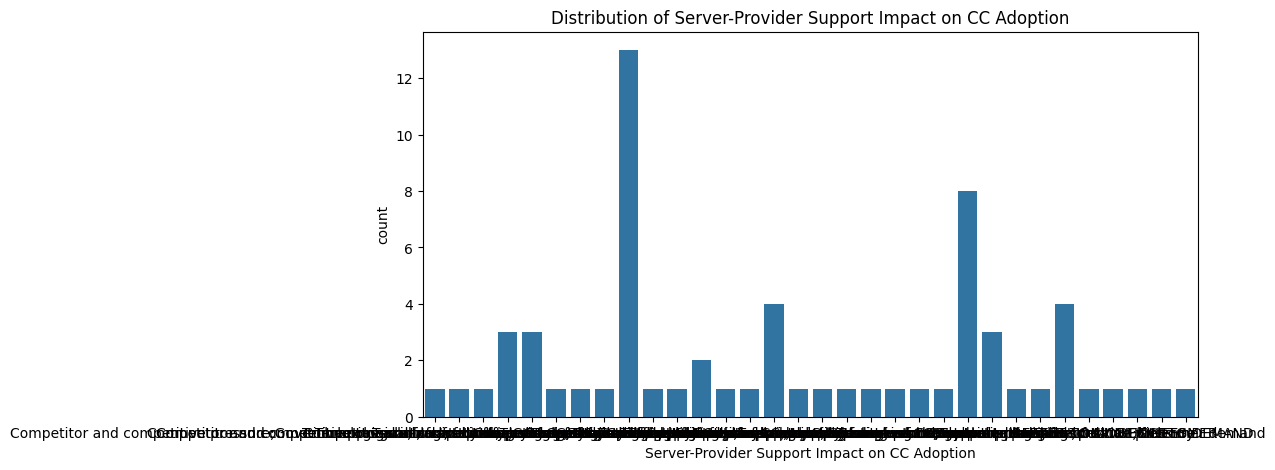

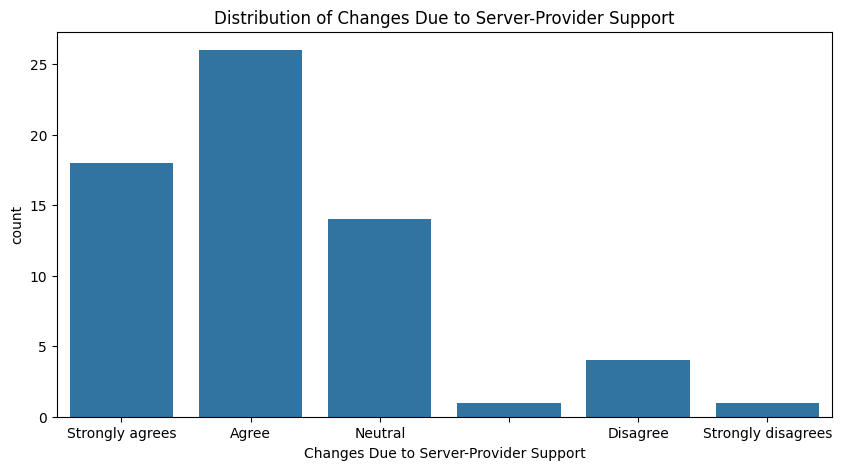

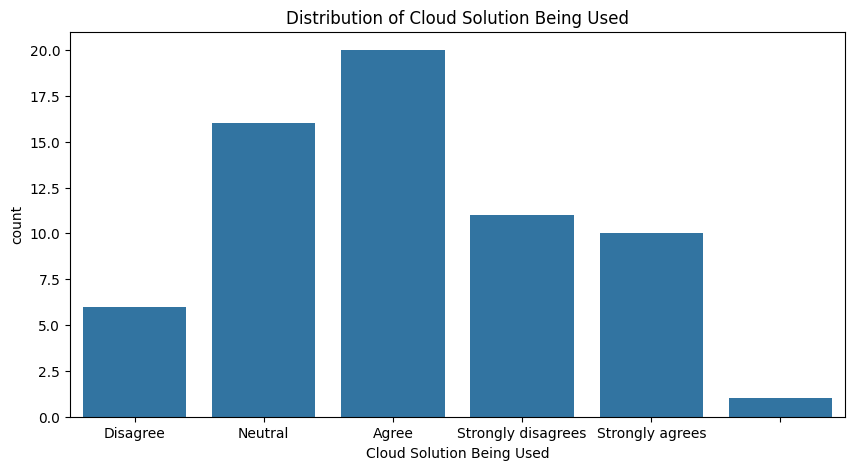

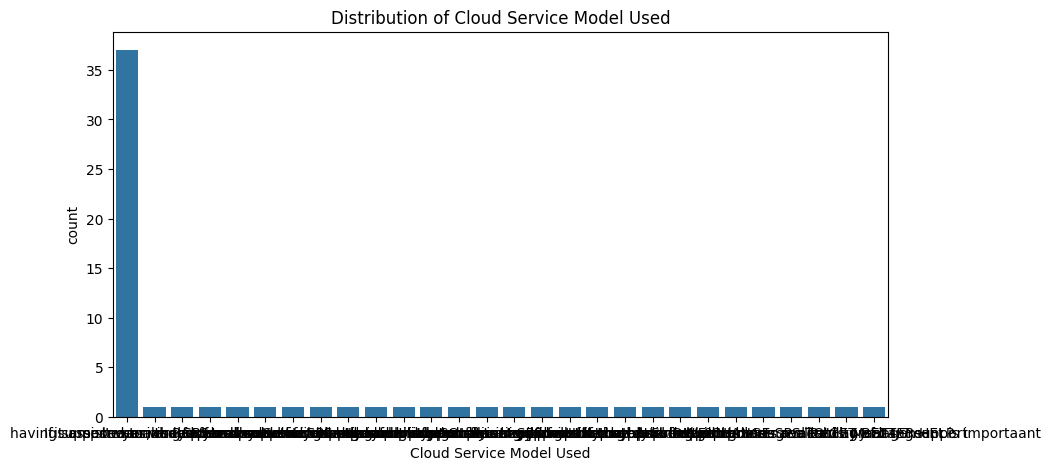

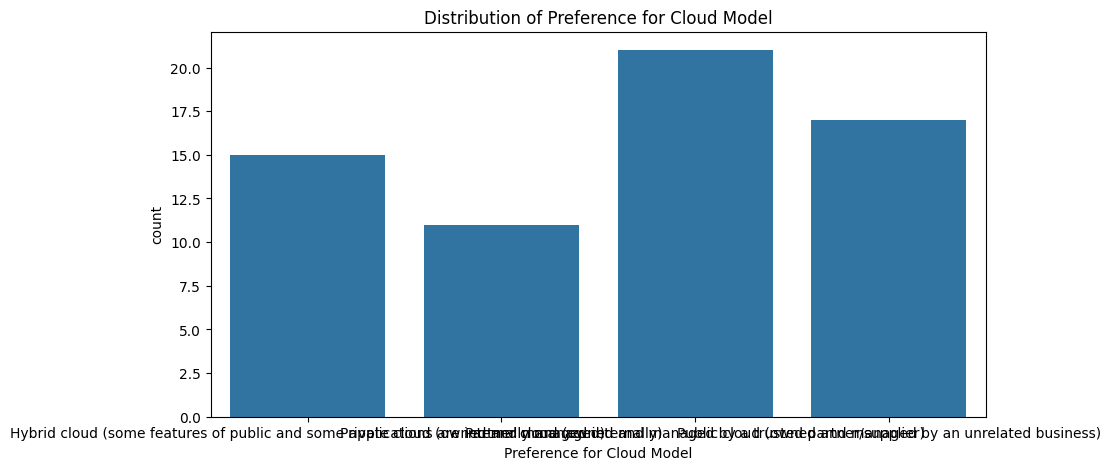

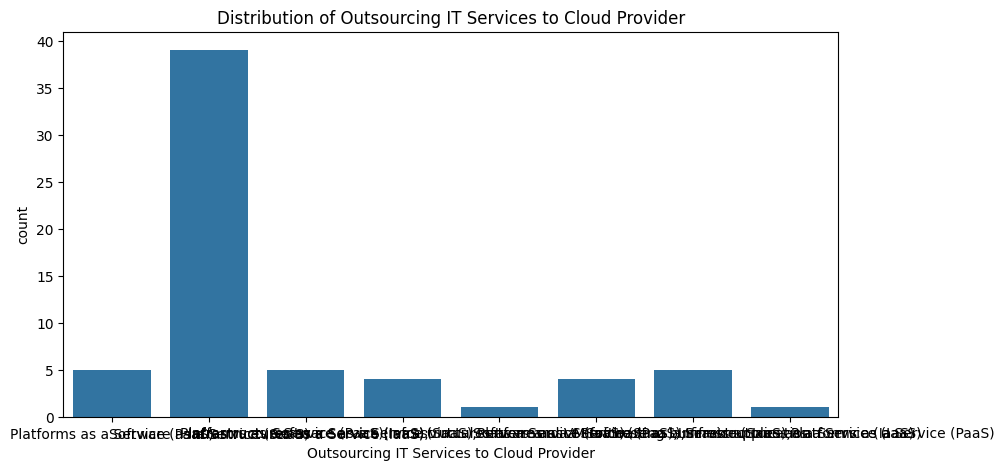

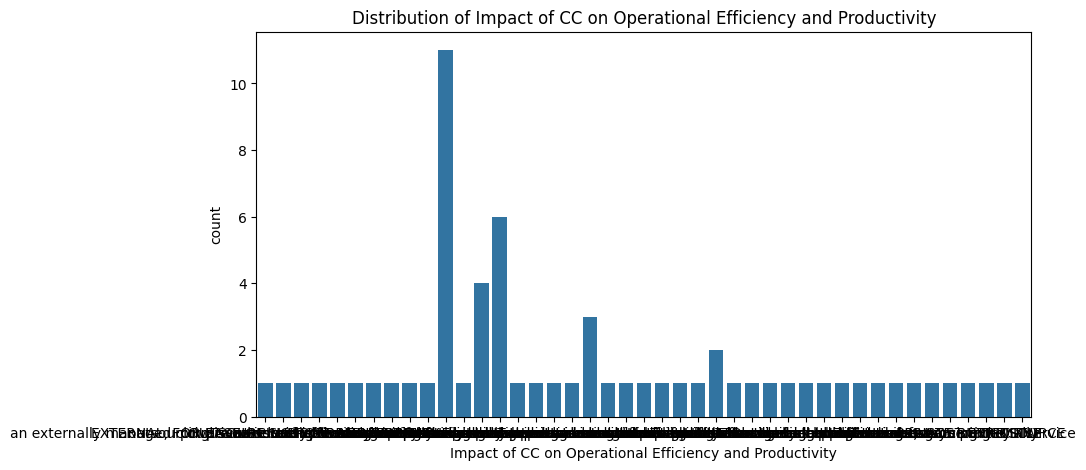

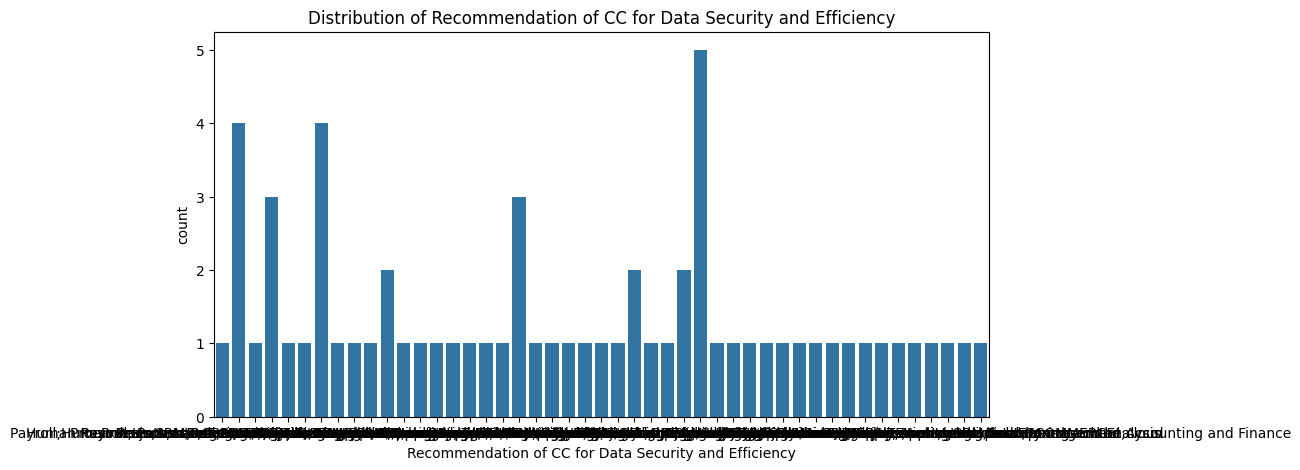

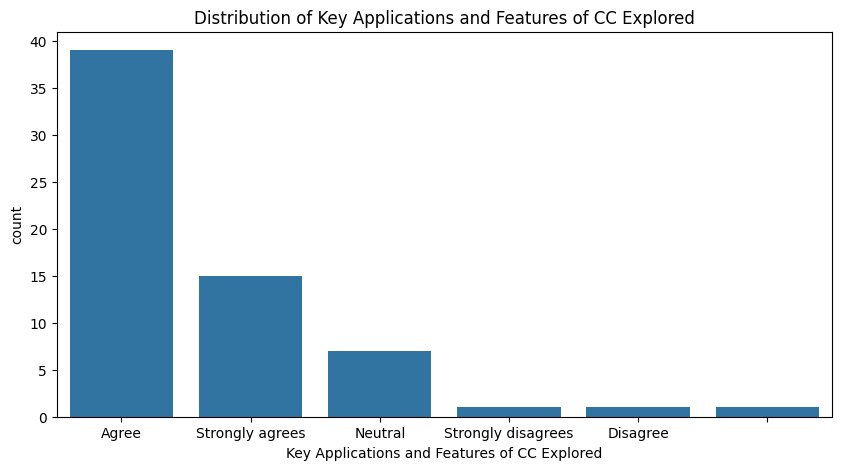

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

### Correlation analysis

*   A correlation coefficient between 0.1 and 0.3 (or -0.1 and -0.3) indicates a weak relationship.

*   A correlation coefficient between 0.3 and 0.7 (or -0.3 and -0.7) indicates a moderate relationship.
*   A correlation coefficient above 0.7 (or below -0.7) indicates a strong relationship.



#### for numeric


Without age and year

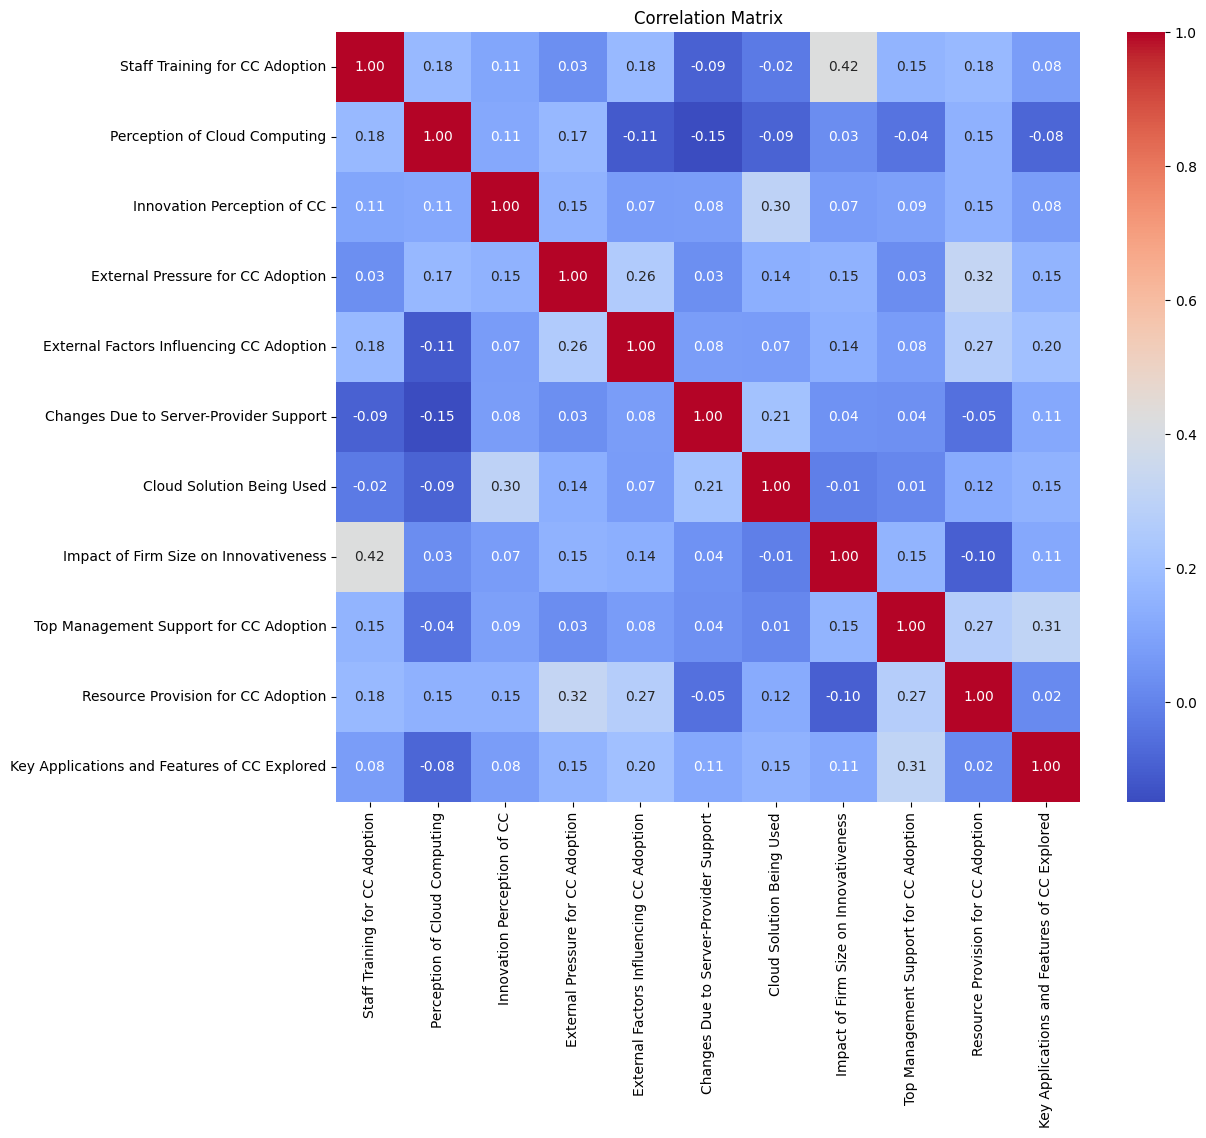

In [ ]:
 # Perform correlation analysis
correlation_matrix = numeric_df.iloc[:, 2:].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

With age and year

In [ ]:
# Encode categorical columns
for columnr in numeric_columns:
    numeric_df[columnr] = pd.Categorical(numeric_df[columnr])
    numeric_df[columnr] = numeric_df[columnr].cat.codes

<ipython-input-20-f750f59c402b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[columnr] = pd.Categorical(numeric_df[columnr])
<ipython-input-20-f750f59c402b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[columnr] = numeric_df[columnr].cat.codes
<ipython-input-20-f750f59c402b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

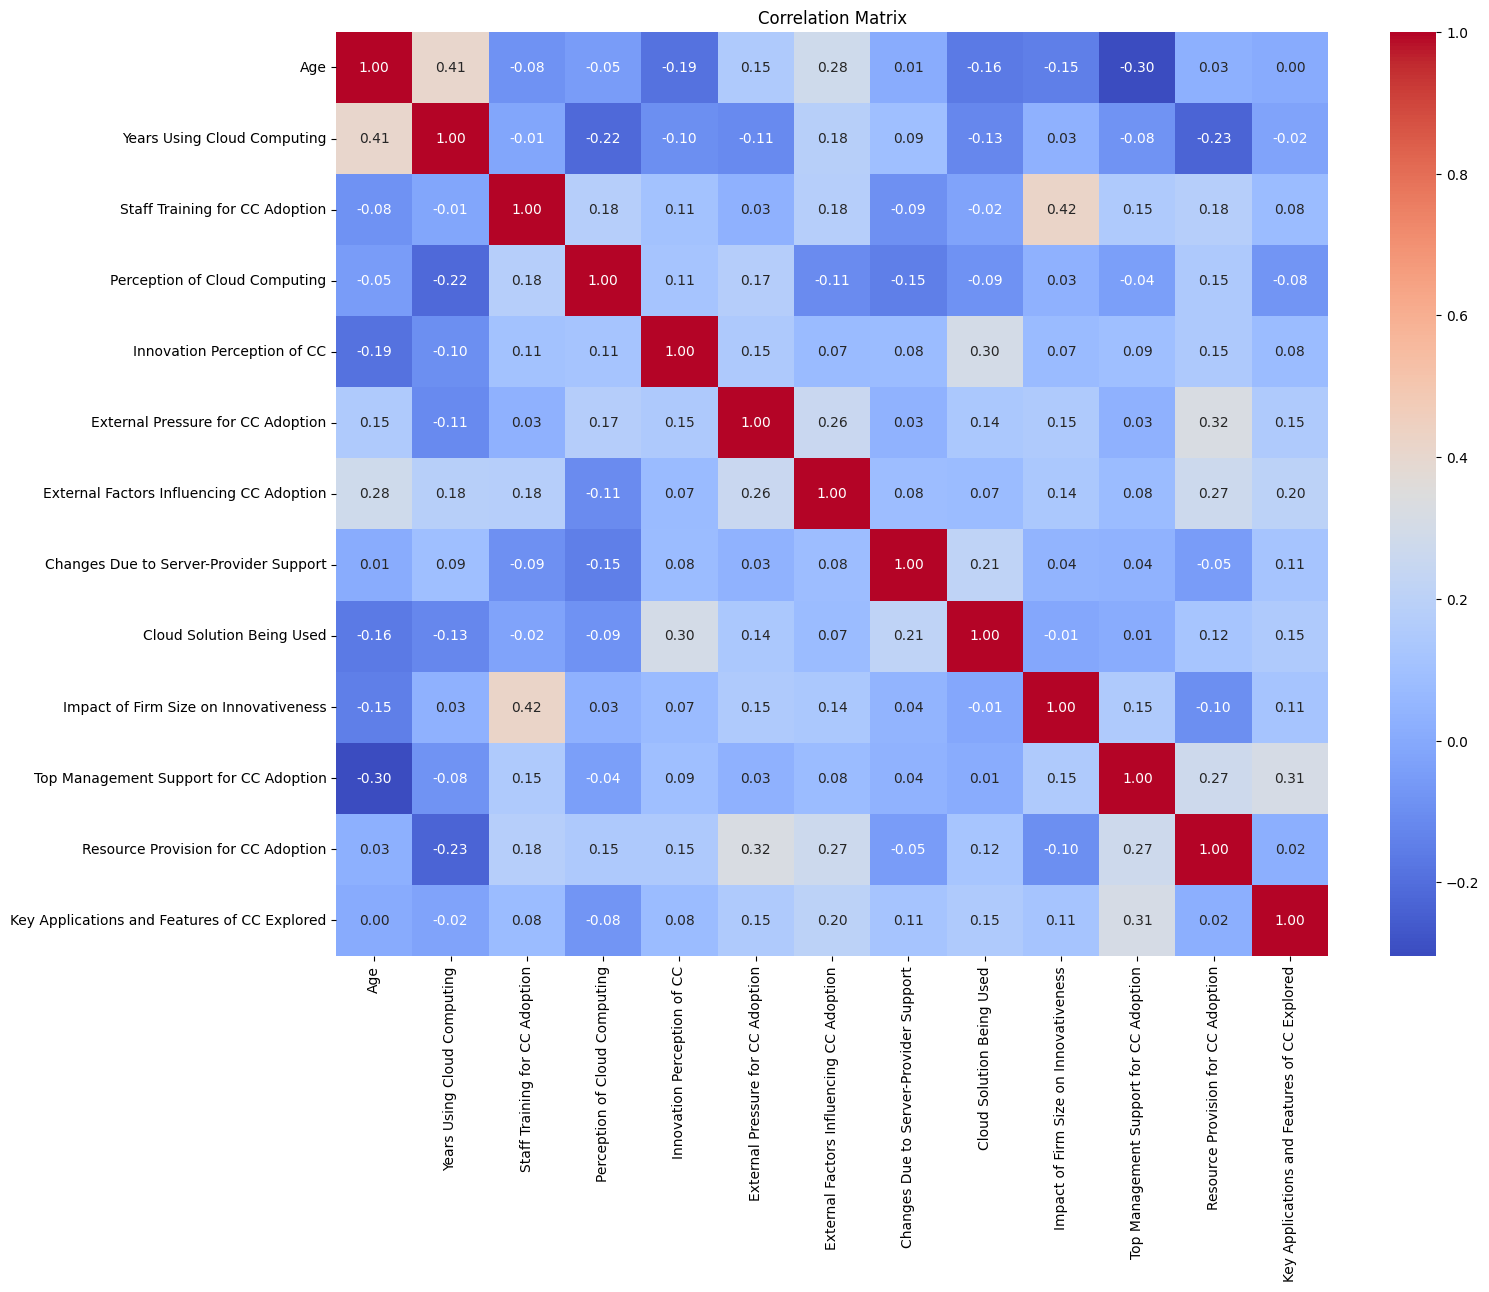

In [ ]:
 # Perform correlation analysis
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### for non numeric

##### Encoding

In [ ]:
# Encode categorical columns
for columnf in categorical_columns:
    categorical_df[columnf] = pd.Categorical(categorical_df[columnf])
    categorical_df[columnf] = categorical_df[columnf].cat.codes

<ipython-input-22-2c6f4d131455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[columnf] = pd.Categorical(categorical_df[columnf])
<ipython-input-22-2c6f4d131455>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[columnf] = categorical_df[columnf].cat.codes
<ipython-input-22-2c6f4d131455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

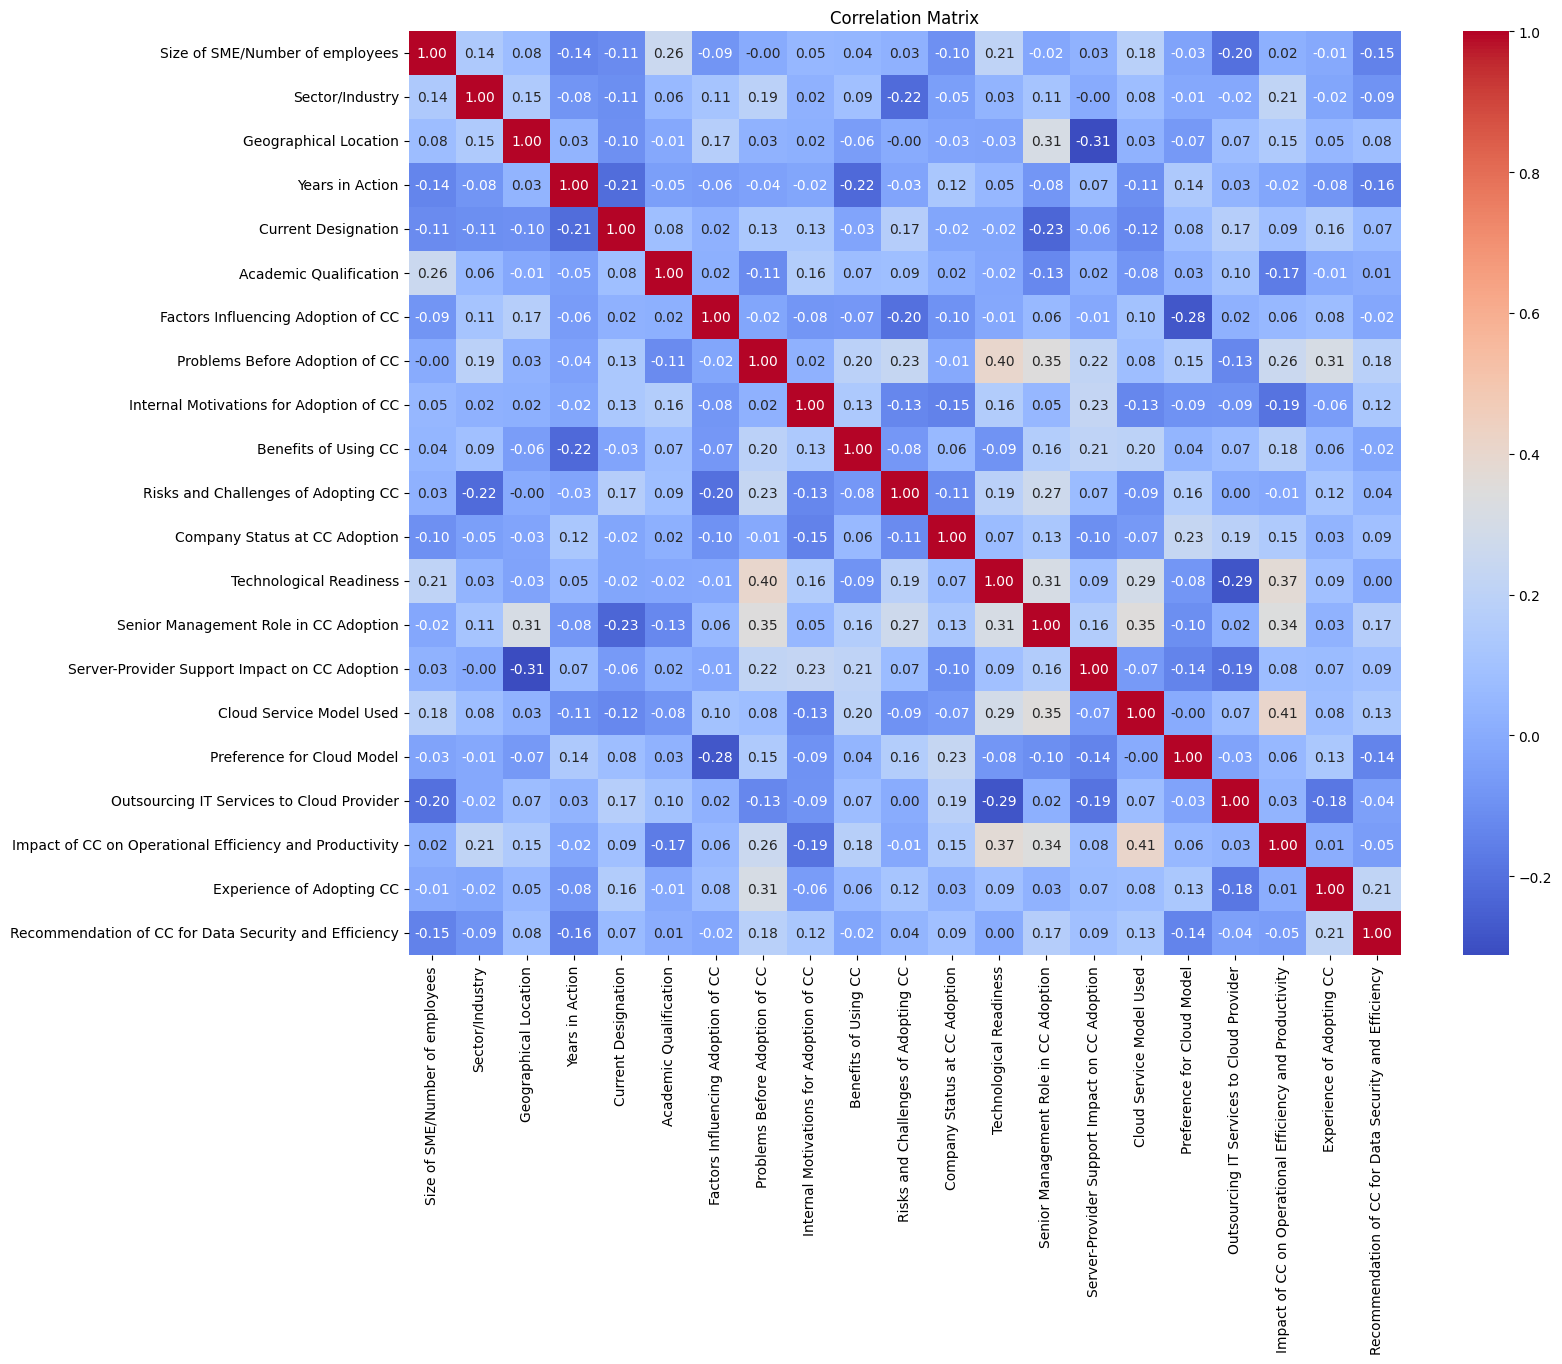

In [ ]:
# Perform correlation analysis on encoded data
correlation_matrixf = categorical_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrixf, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
correlation_matrixf

,Size of SME/Number of employees,Sector/Industry,Geographical Location,Years in Action,Current Designation,Academic Qualification,Factors Influencing Adoption of CC,Problems Before Adoption of CC,Internal Motivations for Adoption of CC,Benefits of Using CC,...,Company Status at CC Adoption,Technological Readiness,Senior Management Role in CC Adoption,Server-Provider Support Impact on CC Adoption,Cloud Service Model Used,Preference for Cloud Model,Outsourcing IT Services to Cloud Provider,Impact of CC on Operational Efficiency and Productivity,Experience of Adopting CC,Recommendation of CC for Data Security and Efficiency
Size of SME/Number of employees,1.000000,0.143415,0.075675,-0.136050,-0.113616,0.255758,-0.085133,-0.004297,0.049812,0.041825,...,-0.097759,0.209926,-0.015295,0.028946,0.180174,-0.032090,-0.201223,0.017004,-0.007717,-0.146027
Sector/Industry,0.143415,1.000000,0.145001,-0.082999,-0.106733,0.058506,0.109346,0.192981,0.021469,0.090016,...,-0.049685,0.033785,0.109176,-0.001675,0.078977,-0.012307,-0.015117,0.213490,-0.023349,-0.086959
Geographical Location,0.075675,0.145001,1.000000,0.032132,-0.097814,-0.010542,0.172996,0.030600,0.017347,-0.055580,...,-0.026565,-0.031889,0.311554,-0.312475,0.027752,-0.068110,0.073784,0.146714,0.048672,0.077342
Years in Action,-0.136050,-0.082999,0.032132,1.000000,-0.210361,-0.046562,-0.057704,-0.035727,-0.021074,-0.220926,...,0.123446,0.049562,-0.080640,0.067178,-0.105499,0.142676,0.034219,-0.021471,-0.082489,-0.156787
Current Designation,-0.113616,-0.106733,-0.097814,-0.210361,1.000000,0.083781,0.021204,0.129453,0.132602,-0.029898,...,-0.021900,-0.021692,-0.230788,-0.061380,-0.124935,0.081255,0.172313,0.089620,0.156009,0.066308
Academic Qualification,0.255758,0.058506,-0.010542,-0.046562,0.083781,1.000000,0.016413,-0.113304,0.164248,0.074097,...,0.017583,-0.017077,-0.125474,0.015703,-0.083572,0.028308,0.098355,-0.167460,-0.005085,0.007779
Factors Influencing Adoption of CC,-0.085133,0.109346,0.172996,-0.057704,0.021204,0.016413,1.000000,-0.024075,-0.081563,-0.072376,...,-0.095240,-0.012234,0.057973,-0.010359,0.102309,-0.279200,0.022798,0.055446,0.077070,-0.017493
Problems Before Adoption of CC,-0.004297,0.192981,0.030600,-0.035727,0.129453,-0.113304,-0.024075,1.000000,0.020967,0.195015,...,-0.007157,0.404112,0.345809,0.218790,0.082151,0.147525,-0.132098,0.256450,0.312041,0.184383
Internal Motivations for Adoption of CC,0.049812,0.021469,0.017347,-0.021074,0.132602,0.164248,-0.081563,0.020967,1.000000,0.134100,...,-0.147035,0.157765,0.048982,0.228702,-0.131946,-0.093205,-0.088036,-0.192845,-0.060086,0.124277
Benefits of Using CC,0.041825,0.090016,-0.055580,-0.220926,-0.029898,0.074097,-0.072376,0.195015,0.134100,1.000000,...,0.057172,-0.090842,0.163319,0.206534,0.198957,0.039210,0.073574,0.177752,0.056202,-0.020884


### Liner regression

**Linear Regression between multiple variable (multi-variate regression)**

Age and years usig cloud computing

because it give 0.41% corrrelation, so we proceed with this.

In [ ]:
from sklearn.linear_model import LinearRegression

# perform linear regression between "age" and "Years Using Cloud Computing"
y = numeric_df[["Years Using Cloud Computing"]]
x = numeric_df[["Age"]]

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: [1.17577197]
Coefficient: [[0.26948823]]


In [ ]:
r_squared = model.score(x, y)
print("\nRegression Analysis:")
print("R-squared:", r_squared)


Regression Analysis:
R-squared: 0.16421939106024608


The R-squared value of 0.1642 indicates that approximately 16.42% of the variance

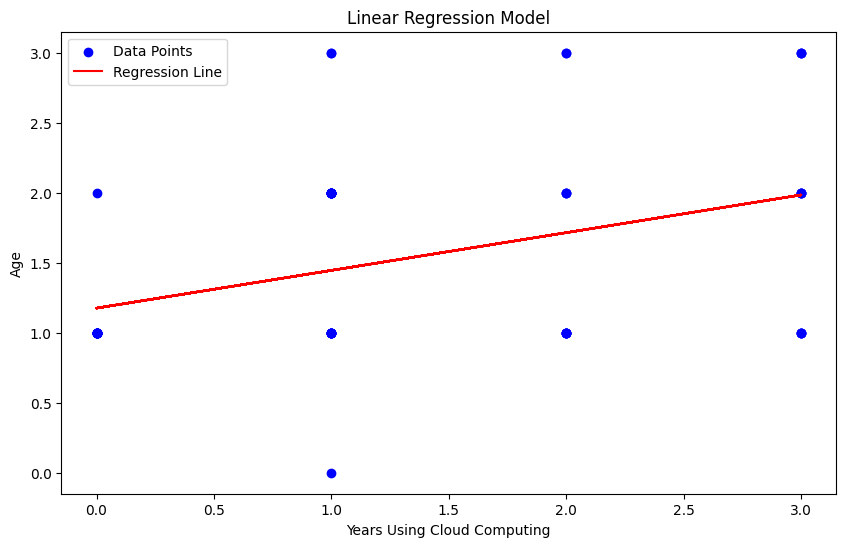

In [ ]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Years Using Cloud Computing')
plt.ylabel('Age')
plt.title('Linear Regression Model')
plt.legend()

# Show plot
plt.show()

**Linear Regression between multiple variable (multi-variate regression)**

Train R-squared: 0.14847057906009464
Test R-squared: -0.09272548542349379


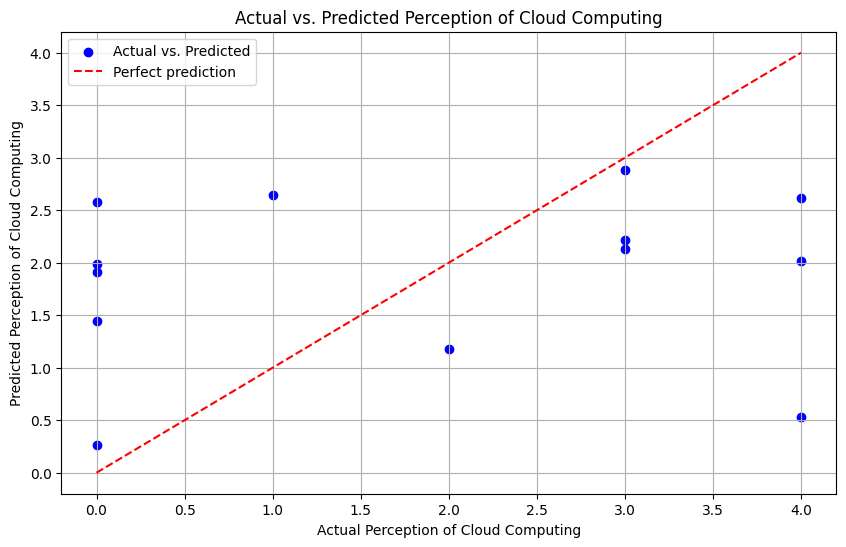

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Define dependent variable (target variable) and independent variables
dependent_variable = "Perception of Cloud Computing"
independent_variables = [
    "Age",
    "Years Using Cloud Computing",
    "Staff Training for CC Adoption",
    "Innovation Perception of CC",
    "External Pressure for CC Adoption",
    "External Factors Influencing CC Adoption",
    "Changes Due to Server-Provider Support",
    "Cloud Solution Being Used",
    "Impact of Firm Size on Innovativeness",
    "Top Management Support for CC Adoption",
    "Resource Provision for CC Adoption",
    "Key Applications and Features of CC Explored"
]


# Check for missing values in the selected columns
missing_values = numeric_df[[dependent_variable] + independent_variables].isnull().sum()
if missing_values.any():
    print("Warning: Missing values found in selected columns. Please handle missing values before proceeding.")
    print("Number of missing values:")
    print(missing_values)
else:
    # Split data into train and test sets
    X = numeric_df[independent_variables]
    y = numeric_df[dependent_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print("Train R-squared:", train_r2)
    print("Test R-squared:", test_r2)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs. Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect prediction')
    plt.title('Actual vs. Predicted Perception of Cloud Computing')
    plt.xlabel('Actual Perception of Cloud Computing')
    plt.ylabel('Predicted Perception of Cloud Computing')
    plt.legend()
    plt.grid(True)
    plt.show()


The Train R-squared value of 0.1485 indicates that approximately 14.85% of the variance in the perception of cloud computing is explained by the independent variables in the training data. The Test R-squared value of -0.0927 suggests that the model performs poorly on the test data.

Train R-squared: 0.41263484272816253
Test R-squared: 0.07143495562638935


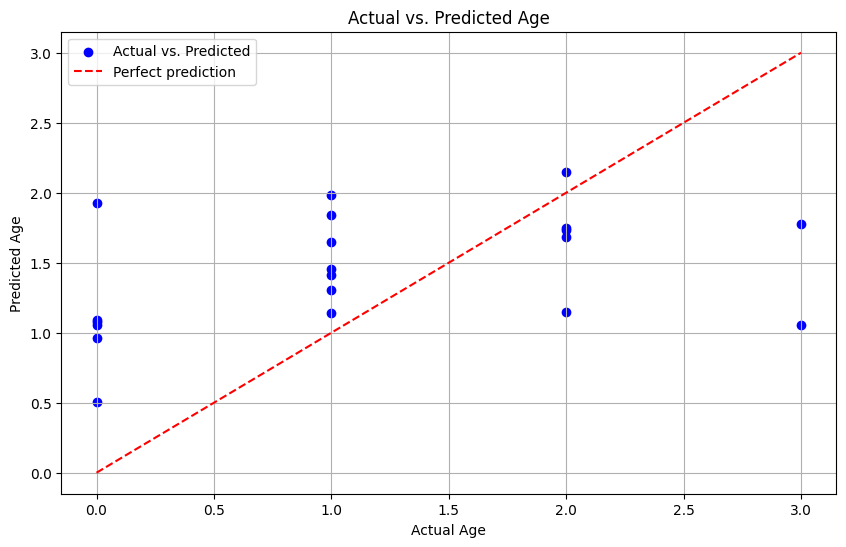

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Define dependent variable (target variable) and independent variables
dependent_variable = "Age"
independent_variables = [
    "Perception of Cloud Computing",
    "Years Using Cloud Computing",
    "Staff Training for CC Adoption",
    "Innovation Perception of CC",
    "External Pressure for CC Adoption",
    "External Factors Influencing CC Adoption",
    "Changes Due to Server-Provider Support",
    "Cloud Solution Being Used",
    "Impact of Firm Size on Innovativeness",
    "Top Management Support for CC Adoption",
    "Resource Provision for CC Adoption",
    "Key Applications and Features of CC Explored"
]


# Check for missing values in the selected columns
missing_values = numeric_df[[dependent_variable] + independent_variables].isnull().sum()
if missing_values.any():
    print("Warning: Missing values found in selected columns. Please handle missing values before proceeding.")
    print("Number of missing values:")
    print(missing_values)
else:
    # Split data into train and test sets
    X = numeric_df[independent_variables]
    y = numeric_df[dependent_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print("Train R-squared:", train_r2)
    print("Test R-squared:", test_r2)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs. Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect prediction')
    plt.title('Actual vs. Predicted Age')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.legend()
    plt.grid(True)
    plt.show()


The Train R-squared value of 0.4126 indicates that approximately 41.26% of the variance in the perception of cloud computing is explained by the independent variables in the training data. This suggests a moderate level of explanatory power of the model on the training data.
The Test R-squared value of 0.0714 suggests that the model has limited predictive power on the test data. While the model explains some variance in the test data, it is relatively low compared to the training data.

***DONE***